In [1]:
library('SelectSim')
library('tidyverse')
library('ggplot2')
library('ggpubr')

── Attaching core tidyverse packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
sessionInfo()

R version 4.3.2 (2023-10-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /mnt/ndata/arvind/envs/R_4/lib/libopenblasp-r0.3.25.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Zurich
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] ggpubr_0.6.0      lubridate_1.9.3   forcats_1.0.0     stringr_1.5.1    
 [5] dplyr_1.1.4       purrr_1.0.2       readr_2.1.5       tidyr_1.3.0      
 [9] tibble_3.2.1      ggplot2_3.4.4     tidyverse_2.0.0   SelectSim_0.0.1.3

In [3]:
`%notin%` <- Negate(`%in%`)

# Note
- Ensure the file path are correct in read functions below of the raw downloaded data.
- Ensure the file are saved to correct location based on path decided by the user.

# Genie Metadata

In [4]:
genie_15_metadata_sample <- read.delim('../data/raw/genie/data_clinical_sample.txt')
genie_15_metadata_paitent <- read.delim('../data/raw/genie/data_clinical_patient.txt')

In [5]:
head(genie_15_metadata_paitent)
head(genie_15_metadata_sample)

,PATIENT_ID,SEX,PRIMARY_RACE,ETHNICITY,CENTER,INT_CONTACT,INT_DOD,YEAR_CONTACT,DEAD,YEAR_DEATH
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,GENIE-VICC-101416,Female,White,Non-Spanish/non-Hispanic,VICC,19225,Not Applicable,2014,False,Not Applicable
2,GENIE-VICC-102225,Female,White,Non-Spanish/non-Hispanic,VICC,12057,12487,2015,True,2017
3,GENIE-VICC-102424,Female,White,Non-Spanish/non-Hispanic,VICC,23505,23625,2016,True,2016
4,GENIE-VICC-102966,Male,White,Non-Spanish/non-Hispanic,VICC,23426,23430,2015,True,2015
5,GENIE-VICC-103244,Female,Unknown,Unknown,VICC,18267,18311,2014,True,2014
6,GENIE-VICC-103477,Male,Unknown,Non-Spanish/non-Hispanic,VICC,14626,14646,2014,True,2014


,PATIENT_ID,SAMPLE_ID,AGE_AT_SEQ_REPORT,ONCOTREE_CODE,SAMPLE_TYPE,SEQ_ASSAY_ID,CANCER_TYPE,CANCER_TYPE_DETAILED,SAMPLE_TYPE_DETAILED
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,GENIE-VICC-101416,GENIE-VICC-101416-unk-1,52,MAAP,Primary,VICC-01-T7,Appendiceal Cancer,Mucinous Adenocarcinoma of the Appendix,Primary tumor
2,GENIE-VICC-102225,GENIE-VICC-102225-unk-1,31,READ,Metastasis,VICC-01-T7,Colorectal Cancer,Rectal Adenocarcinoma,Metastasis site unspecified
3,GENIE-VICC-102424,GENIE-VICC-102424-unk-1,63,SCCNOS,Metastasis,VICC-01-T7,Cancer of Unknown Primary,"Squamous Cell Carcinoma, NOS",Metastasis site unspecified
4,GENIE-VICC-102966,GENIE-VICC-102966-unk-1,64,LUAD,Metastasis,VICC-01-T7,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Metastasis site unspecified
5,GENIE-VICC-103244,GENIE-VICC-103244-unk-1,50,IDC,Primary,VICC-01-T5A,Breast Cancer,Breast Invasive Ductal Carcinoma,Primary tumor
6,GENIE-VICC-103477,GENIE-VICC-103477-unk-1,40,MRLS,Primary,VICC-01-D2,Soft Tissue Sarcoma,Myxoid/Round-Cell Liposarcoma,Primary tumor


In [6]:
genie_metadata <- inner_join(genie_15_metadata_paitent,genie_15_metadata_sample,by = "PATIENT_ID")

In [7]:
head(genie_metadata)

,PATIENT_ID,SEX,PRIMARY_RACE,ETHNICITY,CENTER,INT_CONTACT,INT_DOD,YEAR_CONTACT,DEAD,YEAR_DEATH,SAMPLE_ID,AGE_AT_SEQ_REPORT,ONCOTREE_CODE,SAMPLE_TYPE,SEQ_ASSAY_ID,CANCER_TYPE,CANCER_TYPE_DETAILED,SAMPLE_TYPE_DETAILED
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,GENIE-VICC-101416,Female,White,Non-Spanish/non-Hispanic,VICC,19225,Not Applicable,2014,False,Not Applicable,GENIE-VICC-101416-unk-1,52,MAAP,Primary,VICC-01-T7,Appendiceal Cancer,Mucinous Adenocarcinoma of the Appendix,Primary tumor
2,GENIE-VICC-102225,Female,White,Non-Spanish/non-Hispanic,VICC,12057,12487,2015,True,2017,GENIE-VICC-102225-unk-1,31,READ,Metastasis,VICC-01-T7,Colorectal Cancer,Rectal Adenocarcinoma,Metastasis site unspecified
3,GENIE-VICC-102424,Female,White,Non-Spanish/non-Hispanic,VICC,23505,23625,2016,True,2016,GENIE-VICC-102424-unk-1,63,SCCNOS,Metastasis,VICC-01-T7,Cancer of Unknown Primary,"Squamous Cell Carcinoma, NOS",Metastasis site unspecified
4,GENIE-VICC-102966,Male,White,Non-Spanish/non-Hispanic,VICC,23426,23430,2015,True,2015,GENIE-VICC-102966-unk-1,64,LUAD,Metastasis,VICC-01-T7,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Metastasis site unspecified
5,GENIE-VICC-103244,Female,Unknown,Unknown,VICC,18267,18311,2014,True,2014,GENIE-VICC-103244-unk-1,50,IDC,Primary,VICC-01-T5A,Breast Cancer,Breast Invasive Ductal Carcinoma,Primary tumor
6,GENIE-VICC-103477,Male,Unknown,Non-Spanish/non-Hispanic,VICC,14626,14646,2014,True,2014,GENIE-VICC-103477-unk-1,40,MRLS,Primary,VICC-01-D2,Soft Tissue Sarcoma,Myxoid/Round-Cell Liposarcoma,Primary tumor


In [8]:
genie_maf <- read.delim('../data/raw/genie/data_mutations_extended.txt')

# MSK Cohort Filtering and annotations 

## Filtering 

In [9]:
genie_metadata_15_msk <- genie_metadata %>% filter(CENTER=='MSK')

In [10]:
dim(genie_metadata_15_msk)

[1] 89980    18

In [11]:
length(unique(genie_metadata_15_msk$SAMPLE_ID))
length(unique(genie_metadata_15_msk$PATIENT_ID))

[1] 89980

[1] 70407

In [12]:
dim(genie_metadata)

[1] 198041     18

In [13]:
genie_maf_mut <- genie_maf %>% select(Chromosome,Start_Position,End_Position,Hugo_Symbol,Variant_Classification,Tumor_Sample_Barcode,HGVSp_Short) %>%
filter(Tumor_Sample_Barcode %in% genie_metadata$SAMPLE_ID)

In [14]:
dim(genie_maf_mut)

[1] 1840311       7

In [15]:
genie_maf_mut %>% head()

,Chromosome,Start_Position,End_Position,Hugo_Symbol,Variant_Classification,Tumor_Sample_Barcode,HGVSp_Short
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,12,25398285,25398285,KRAS,Missense_Mutation,GENIE-JHU-00006-00185,p.G12C
2,7,140453136,140453136,BRAF,Missense_Mutation,GENIE-JHU-00006-00185,p.V600E
3,7,55249071,55249071,EGFR,Missense_Mutation,GENIE-JHU-00006-00185,p.T790M
4,17,7577120,7577120,TP53,Missense_Mutation,GENIE-JHU-00006-00185,p.R273H
5,1,115256529,115256529,NRAS,Missense_Mutation,GENIE-JHU-00006-00185,p.Q61R
6,3,178952085,178952085,PIK3CA,Missense_Mutation,GENIE-JHU-00006-00185,p.H1047R


In [16]:
length(unique(genie_maf_mut$Tumor_Sample_Barcode))

[1] 171195

In [17]:
genie_maf_msk <- genie_maf %>% select(Chromosome,Start_Position,End_Position,Hugo_Symbol,Variant_Classification,Tumor_Sample_Barcode,HGVSp_Short) %>%
filter(Tumor_Sample_Barcode %in% genie_metadata_15_msk$SAMPLE_ID)

In [18]:
genie_metadata_15_msk_with_mutation<-genie_metadata_15_msk %>% filter(SAMPLE_ID %in% unique(genie_maf_msk$Tumor_Sample_Barcode))

In [19]:
length(unique(genie_metadata_15_msk_with_mutation$PATIENT_ID))
length(unique(genie_metadata_15_msk_with_mutation$SAMPLE_ID))

[1] 63596

[1] 77398

In [20]:
dim(genie_metadata_15_msk_with_mutation)

[1] 77398    18

In [21]:
genie_metadata_15_msk_with_mutation %>% count(SAMPLE_TYPE)

SAMPLE_TYPE,n
<chr>,<int>
Metastasis,26193
Primary,43108
Unspecified,8097


In [22]:
length(unique((genie_metadata_15_msk_with_mutation %>% filter(SAMPLE_TYPE %in% c('Metastasis','Primary')))$SAMPLE_ID))
length(unique((genie_metadata_15_msk_with_mutation %>% filter(SAMPLE_TYPE %in% c('Metastasis','Primary')))$PATIENT_ID))

[1] 69301

[1] 59829

In [23]:
genie_metadata_15_msk_with_mutation<-genie_metadata_15_msk_with_mutation %>% filter(SAMPLE_TYPE %in% c('Metastasis','Primary')) 

In [24]:
msk_one_sample_one_pateint<-(genie_metadata_15_msk_with_mutation %>% select(PATIENT_ID,SAMPLE_ID) %>% distinct() %>% group_by(PATIENT_ID) %>%
filter(n()==1) %>% ungroup())$SAMPLE_ID

In [25]:
genie_metadata_15_msk_with_mutation %>% select(PATIENT_ID,SAMPLE_ID) %>% count(PATIENT_ID) %>% count(n,name='freq')

n,freq
<int>,<int>
1,52561
2,5787
3,1062
4,272
5,71
6,33
7,19
8,15
9,6


In [26]:
genie_metadata_15_msk_with_mutation %>% filter(SAMPLE_TYPE %in% c('Metastasis','Primary')) %>% count(PATIENT_ID) %>% count(n,name = "freq") %>% filter(n>1) %>% sum

[1] 7333

In [27]:
genie_metadata_15_msk_with_mutation %>% filter(SAMPLE_TYPE %in% c('Metastasis','Primary')) %>% count(PATIENT_ID) %>% count(n,name = "freq") %>% filter(n==1) %>% sum

[1] 52562

In [28]:
# Selecting one sample one paitent mutation metadata
genie_metadata_15_msk_with_mutation_selected <- genie_metadata_15_msk_with_mutation %>% filter(SAMPLE_ID %in% msk_one_sample_one_pateint)

In [29]:
dim(genie_metadata_15_msk_with_mutation_selected)

[1] 52561    18

In [30]:
# Filtering & ensuring there are atleast 30 primiary and Metastasis samples
onco_codes_gt_30<-(genie_metadata_15_msk_with_mutation %>% filter(SAMPLE_ID %in% msk_one_sample_one_pateint) %>% group_by(ONCOTREE_CODE) %>% 
filter(all(c("Primary", "Metastasis") %in% SAMPLE_TYPE)) %>% count(ONCOTREE_CODE,SAMPLE_TYPE)  %>% 
pivot_wider(names_from =  'SAMPLE_TYPE',id_cols = 'ONCOTREE_CODE',values_from = 'n') %>% filter(Metastasis>=30 | Primary>=30))$ONCOTREE_CODE

In [31]:
length(onco_codes_gt_30)

[1] 151

In [32]:
onco_codes_gt_30_selected <- (genie_metadata_15_msk_with_mutation %>% filter(SAMPLE_ID %in% msk_one_sample_one_pateint) %>% filter(ONCOTREE_CODE %in% onco_codes_gt_30) %>% 
filter(CANCER_TYPE %notin% c('UNKNOWN','Cancer of Unknown Primary')) %>% select(ONCOTREE_CODE) %>% distinct())$ONCOTREE_CODE

In [33]:
genie_metadata_15_msk_with_mutation_selected_final<-genie_metadata_15_msk_with_mutation %>% filter(SAMPLE_ID %in% msk_one_sample_one_pateint) %>%
                                              filter(ONCOTREE_CODE %in% onco_codes_gt_30_selected)

In [34]:
dim(genie_metadata_15_msk_with_mutation)
dim(genie_metadata_15_msk_with_mutation_selected_final)

[1] 69301    18

[1] 46652    18

In [35]:
consider_codes<-(genie_metadata_15_msk_with_mutation_selected_final %>% count(CANCER_TYPE,ONCOTREE_CODE) %>%  filter(n>=100))$ONCOTREE_CODE

In [36]:
genie_metadata_15_msk_with_mutation_selected_final_freeze<-genie_metadata_15_msk_with_mutation_selected_final %>% filter(SAMPLE_ID %in% msk_one_sample_one_pateint) %>%
                                              filter(ONCOTREE_CODE %in% consider_codes)

In [37]:
dim(genie_metadata_15_msk_with_mutation_selected_final_freeze)

[1] 42790    18

In [38]:
dim(genie_metadata_15_msk_with_mutation)
dim(genie_metadata_15_msk_with_mutation_selected)
dim(genie_metadata_15_msk_with_mutation_selected_final)
dim(genie_metadata_15_msk_with_mutation_selected_final_freeze)

[1] 69301    18

[1] 52561    18

[1] 46652    18

[1] 42790    18

In [39]:
msk_count<-genie_metadata_15_msk_with_mutation_selected_final_freeze %>% count(CANCER_TYPE,ONCOTREE_CODE) %>% arrange(desc(n))

In [40]:
head(msk_count)

,CANCER_TYPE,ONCOTREE_CODE,n
,<chr>,<chr>,<int>
1,Non-Small Cell Lung Cancer,LUAD,4829
2,Colorectal Cancer,COAD,3476
3,Breast Cancer,IDC,3230
4,Pancreatic Cancer,PAAD,2927
5,Prostate Cancer,PRAD,2784
6,Ovarian Cancer,HGSOC,1598


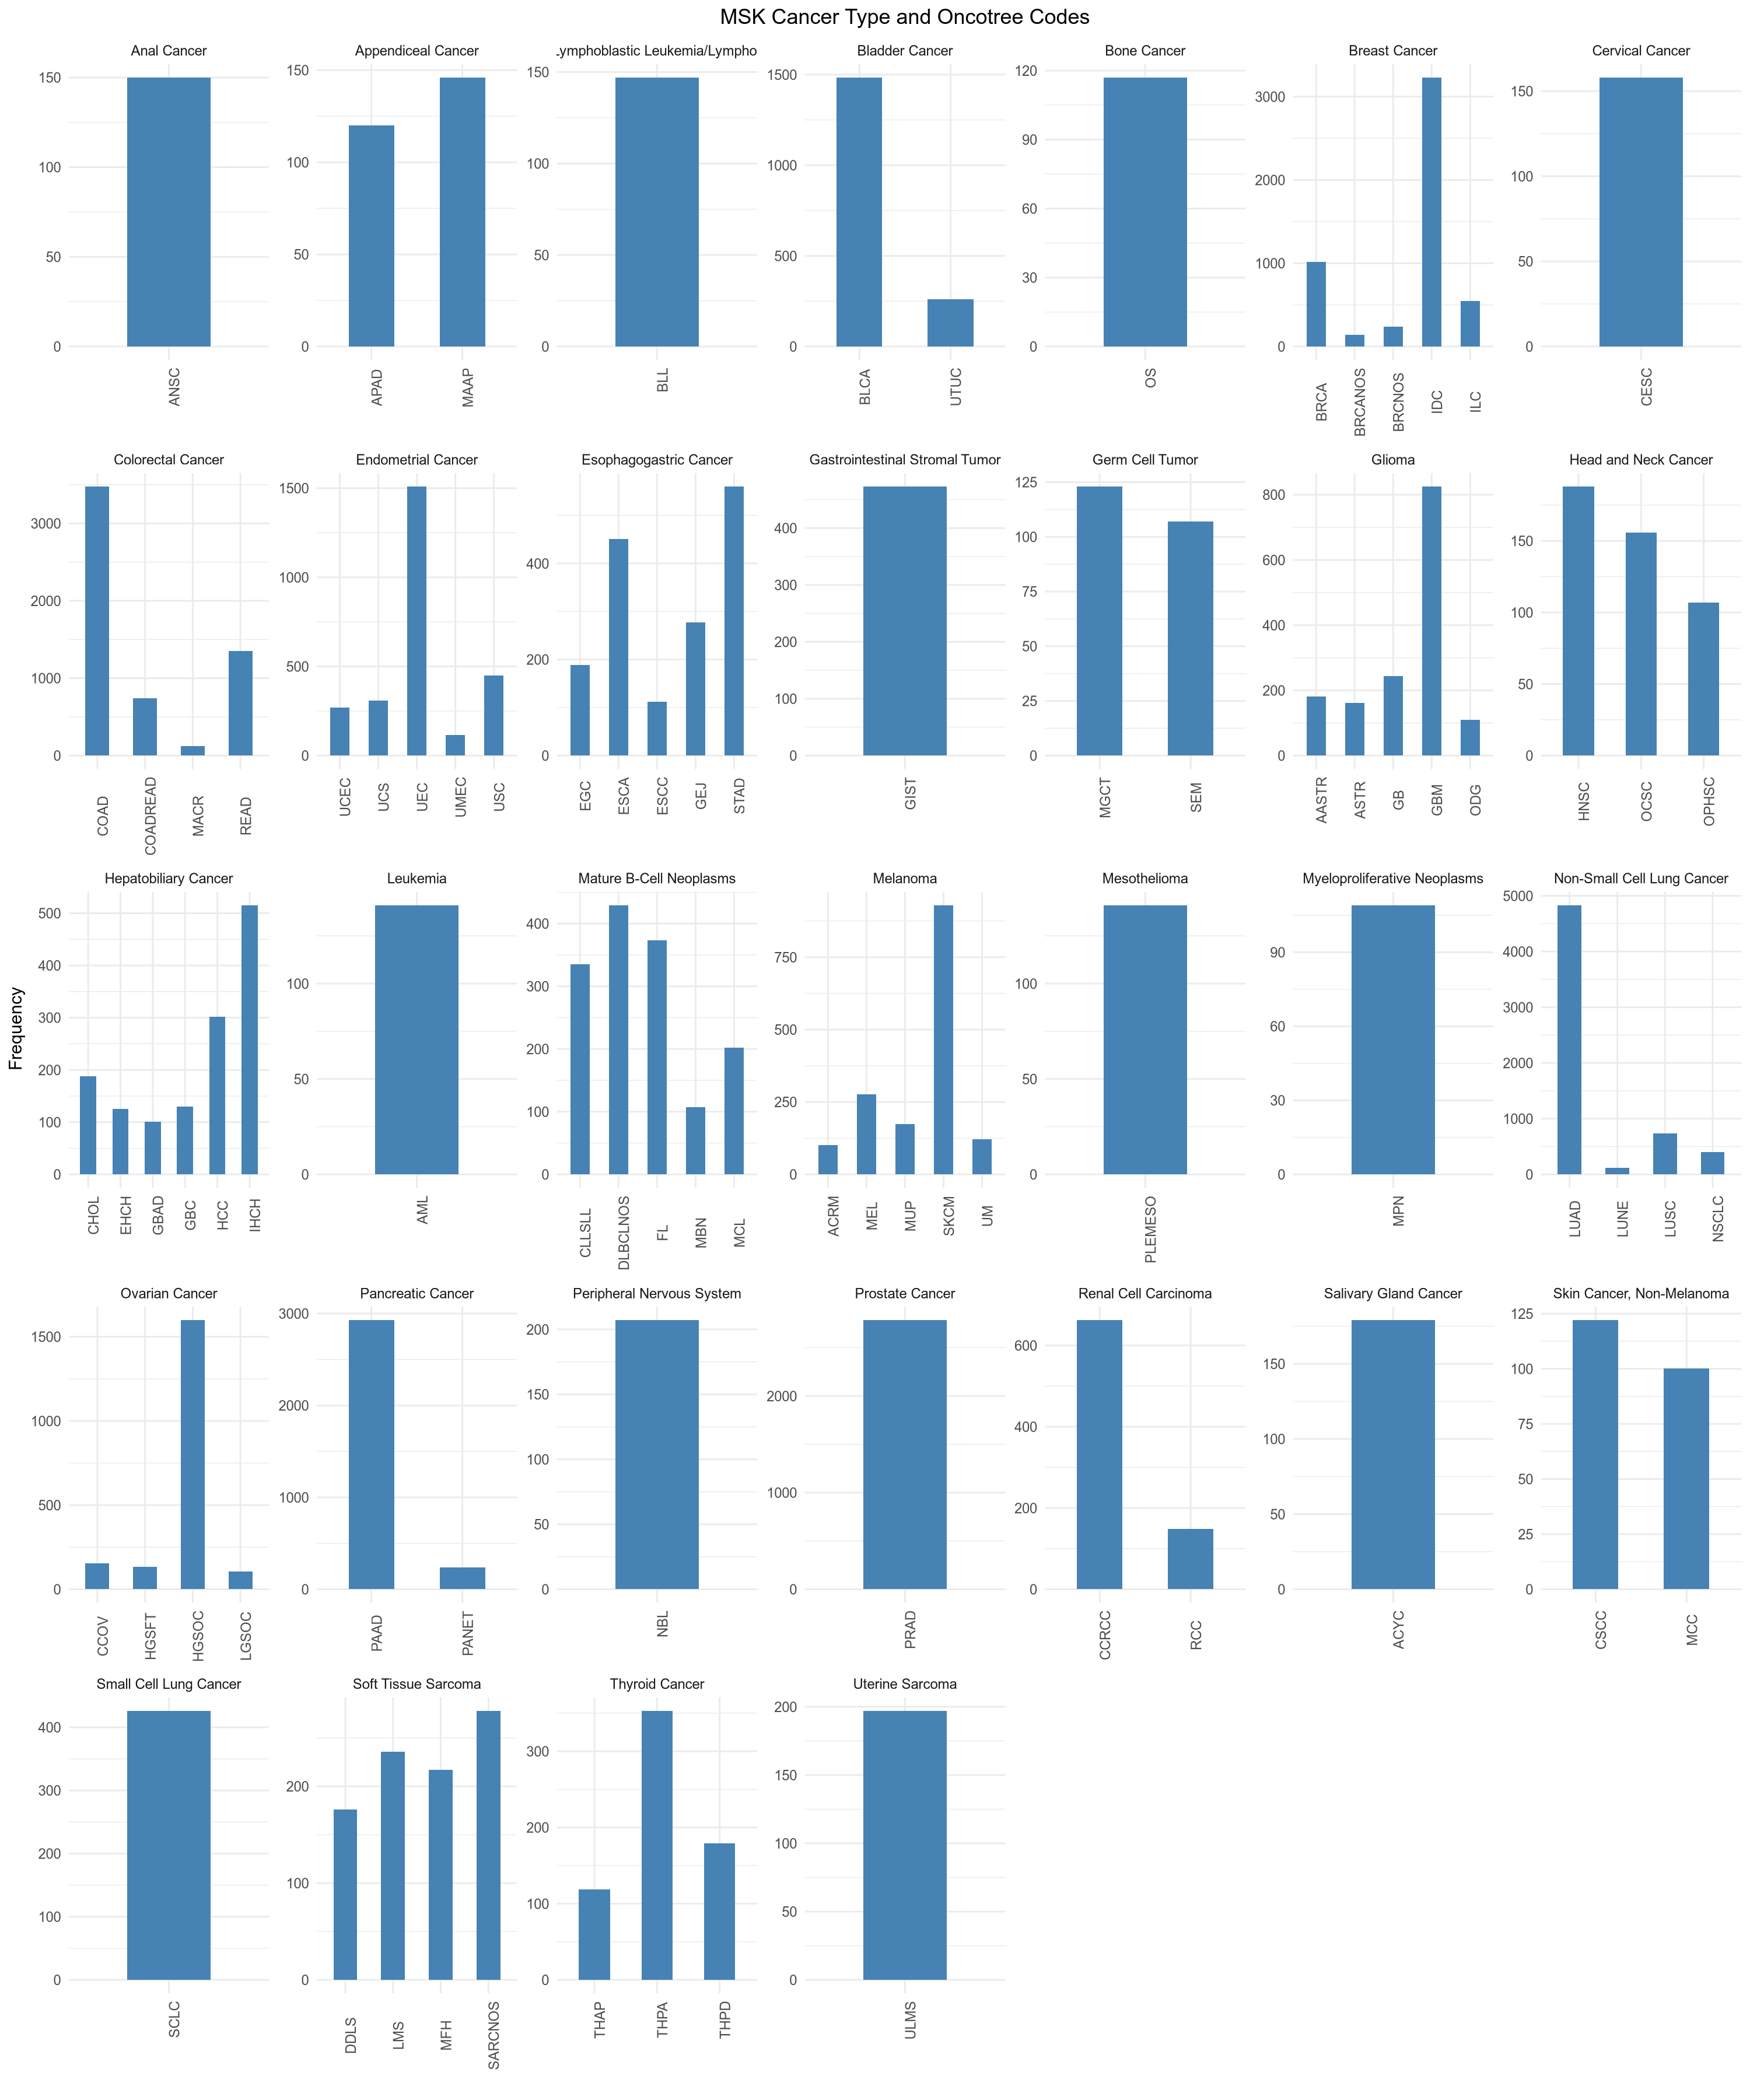

In [41]:
# Create a bar plot faceted by group
options(repr.plot.width = 25,repr.plot.height = 30)
ggplot(msk_count, aes(x = ONCOTREE_CODE, y = n)) +
  geom_bar(stat = "identity", fill = "steelblue",width = 0.5) +
  #geom_text(aes(label = n), vjust = -0.5) +
  facet_wrap(~ CANCER_TYPE, nrow = 7,ncol=7,scales="free") +
  labs(title = "MSK Cancer Type and Oncotree Codes",x='',y = "Frequency") +
  theme_minimal(base_size = 18)+theme(plot.title = element_text(hjust = 0.5),axis.text.x = element_text(angle = 90))

In [42]:
head(genie_metadata_15_msk_with_mutation_selected_final_freeze)

,PATIENT_ID,SEX,PRIMARY_RACE,ETHNICITY,CENTER,INT_CONTACT,INT_DOD,YEAR_CONTACT,DEAD,YEAR_DEATH,SAMPLE_ID,AGE_AT_SEQ_REPORT,ONCOTREE_CODE,SAMPLE_TYPE,SEQ_ASSAY_ID,CANCER_TYPE,CANCER_TYPE_DETAILED,SAMPLE_TYPE_DETAILED
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,GENIE-MSK-P-0000004,Female,White,Non-Spanish/non-Hispanic,MSK,14631,14631,2014,TRUE,2014,GENIE-MSK-P-0000004-T01-IM3,39,IDC,Primary,MSK-IMPACT341,Breast Cancer,Breast Invasive Ductal Carcinoma,Primary tumor
2,GENIE-MSK-P-0000015,Female,White,Non-Spanish/non-Hispanic,MSK,16656,16656,2015,TRUE,2015,GENIE-MSK-P-0000015-T01-IM3,44,IDC,Metastasis,MSK-IMPACT341,Breast Cancer,Breast Invasive Ductal Carcinoma,Metastasis site unspecified
3,GENIE-MSK-P-0000024,Female,White,Non-Spanish/non-Hispanic,MSK,23469,23469,2016,TRUE,2016,GENIE-MSK-P-0000024-T01-IM3,61,UEC,Metastasis,MSK-IMPACT341,Endometrial Cancer,Uterine Endometrioid Carcinoma,Metastasis site unspecified
4,GENIE-MSK-P-0000026,Female,Asian,Non-Spanish/non-Hispanic,MSK,29646,Not Applicable,2023,FALSE,Not Applicable,GENIE-MSK-P-0000026-T01-IM3,71,UEC,Metastasis,MSK-IMPACT341,Endometrial Cancer,Uterine Endometrioid Carcinoma,Metastasis site unspecified
5,GENIE-MSK-P-0000027,Female,White,Non-Spanish/non-Hispanic,MSK,>32485,>32485,>89,TRUE,>89,GENIE-MSK-P-0000027-T01-IM3,81,PLEMESO,Primary,MSK-IMPACT341,Mesothelioma,"Pleural Mesothelioma, Epithelioid Type",Primary tumor
6,GENIE-MSK-P-0000030,Female,Asian,Non-Spanish/non-Hispanic,MSK,25174,Not Applicable,2014,FALSE,Not Applicable,GENIE-MSK-P-0000030-T01-IM3,68,LUAD,Metastasis,MSK-IMPACT341,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Metastasis site unspecified


In [25]:
head(genie_metadata_15_msk_with_mutation_selected_final_atleast_100_samples)

,PATIENT_ID,SEX,PRIMARY_RACE,ETHNICITY,CENTER,INT_CONTACT,INT_DOD,YEAR_CONTACT,DEAD,YEAR_DEATH,SAMPLE_ID,AGE_AT_SEQ_REPORT,ONCOTREE_CODE,SAMPLE_TYPE,SEQ_ASSAY_ID,CANCER_TYPE,CANCER_TYPE_DETAILED,SAMPLE_TYPE_DETAILED,class,Tumor_run_group
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,GENIE-MSK-P-0000223,Female,White,Non-Spanish/non-Hispanic,MSK,11142,11142,2016,TRUE,2016,GENIE-MSK-P-0000223-T01-IM3,28,AASTR,Primary,MSK-IMPACT341,Glioma,Anaplastic Astrocytoma,Primary tumor,AASTR,AASTR
2,GENIE-MSK-P-0000679,Female,White,Non-Spanish/non-Hispanic,MSK,22267,22267,2015,TRUE,2015,GENIE-MSK-P-0000679-T01-IM3,60,AASTR,Primary,MSK-IMPACT341,Glioma,Anaplastic Astrocytoma,Primary tumor,AASTR,AASTR
3,GENIE-MSK-P-0000748,Male,White,Non-Spanish/non-Hispanic,MSK,26700,26700,2016,TRUE,2016,GENIE-MSK-P-0000748-T01-IM3,70,AASTR,Primary,MSK-IMPACT341,Glioma,Anaplastic Astrocytoma,Primary tumor,AASTR,AASTR
4,GENIE-MSK-P-0001408,Male,Asian,Non-Spanish/non-Hispanic,MSK,20266,Not Applicable,2014,FALSE,Not Applicable,GENIE-MSK-P-0001408-T01-IM3,55,AASTR,Primary,MSK-IMPACT341,Glioma,Anaplastic Astrocytoma,Primary tumor,AASTR,AASTR
5,GENIE-MSK-P-0001450,Female,White,Non-Spanish/non-Hispanic,MSK,18509,Not Applicable,2023,FALSE,Not Applicable,GENIE-MSK-P-0001450-T01-IM3,42,AASTR,Primary,MSK-IMPACT341,Glioma,Anaplastic Astrocytoma,Primary tumor,AASTR,AASTR
6,GENIE-MSK-P-0001591,Male,White,Non-Spanish/non-Hispanic,MSK,7032,7032,2017,TRUE,2017,GENIE-MSK-P-0001591-T01-IM3,18,AASTR,Primary,MSK-IMPACT341,Glioma,Anaplastic Astrocytoma,Primary tumor,AASTR,AASTR


In [43]:
# Filtering maf file to freeze samples
genie_maf_msk <- genie_maf %>% select(Chromosome,Start_Position,End_Position,Hugo_Symbol,Variant_Classification,Tumor_Sample_Barcode,HGVSp_Short) %>%
filter(Tumor_Sample_Barcode %in% genie_metadata_15_msk_with_mutation_selected_final_freeze$SAMPLE_ID)

In [44]:
head(genie_maf_msk)

,Chromosome,Start_Position,End_Position,Hugo_Symbol,Variant_Classification,Tumor_Sample_Barcode,HGVSp_Short
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,1,118165602,118165602,FAM46C,Nonsense_Mutation,GENIE-MSK-P-0081662-T01-IM7,p.R38*
2,9,27209136,27209136,TEK,Missense_Mutation,GENIE-MSK-P-0039091-T01-IM6,p.D865Y
3,20,31372564,31372564,DNMT3B,Missense_Mutation,GENIE-MSK-P-0013676-T01-IM5,p.D69Y
4,4,143003288,143003288,INPP4B,Missense_Mutation,GENIE-MSK-P-0043596-T01-IM6,p.K846N
5,17,70118924,70118926,SOX9,In_Frame_Del,GENIE-MSK-P-0076002-T01-IM7,p.K167del
6,16,347904,347904,AXIN1,Missense_Mutation,GENIE-MSK-P-0002914-T01-IM3,p.H534Q


In [45]:
samples_selected<-(genie_metadata_15_msk_with_mutation_selected_final_freeze)$ONCOTREE_CODE
names(samples_selected)<-(genie_metadata_15_msk_with_mutation_selected_final_freeze)$SAMPLE_ID

In [46]:
length(samples_selected)

[1] 42790

In [47]:
plot_df<-genie_maf_msk %>% 
         count(Tumor_Sample_Barcode) %>%
         filter(Tumor_Sample_Barcode %in% names(samples_selected))%>%
         mutate('category'=samples_selected[Tumor_Sample_Barcode])

In [48]:
head(plot_df)

,Tumor_Sample_Barcode,n,category
,<chr>,<int>,<chr>
1,GENIE-MSK-P-0000004-T01-IM3,4,IDC
2,GENIE-MSK-P-0000015-T01-IM3,7,IDC
3,GENIE-MSK-P-0000024-T01-IM3,6,UEC
4,GENIE-MSK-P-0000026-T01-IM3,4,UEC
5,GENIE-MSK-P-0000027-T01-IM3,1,PLEMESO
6,GENIE-MSK-P-0000030-T01-IM3,10,LUAD


In [49]:
plot_df$log10_TMB <- log1p(plot_df$n) #natural log+1

In [50]:
mean_data <- plot_df %>%
  group_by(category) %>%
  summarise(mean_value = mean(log10_TMB))

In [51]:
head(mean_data)

category,mean_value
<chr>,<dbl>
AASTR,1.636717
ACRM,1.224227
ACYC,1.305060
AML,1.412941
ANSC,1.972762
APAD,1.673330


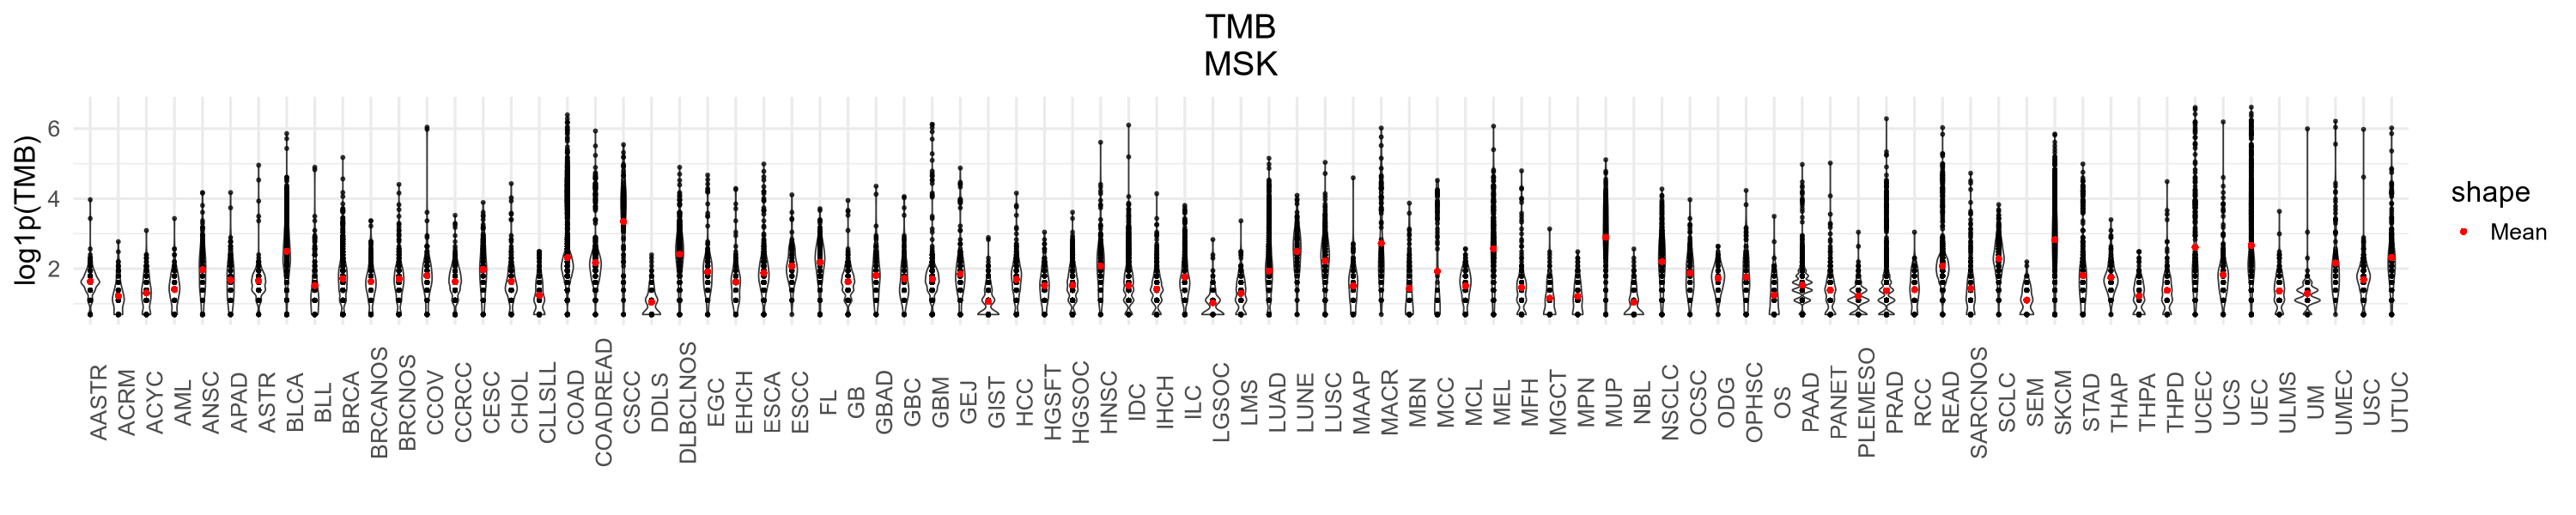

In [52]:
options(repr.plot.width = 25,repr.plot.height = 5)
ggplot(plot_df, aes(x = category, y = log10_TMB)) +
  geom_violin() +
  geom_point(color = "black", size = 1, alpha = 0.7)+
  #geom_point(aes(x = category, y = mean_value, shape = "Mean"), data = mean_data, color = "red", size = 4, alpha = 0.7) +
  geom_point(aes(x = category, y = mean_value, shape = "Mean"), data = mean_data, color = "red", size = 2, fill = "red") +
  labs(title = "TMB\nMSK", x = "", y = "log1p(TMB)") +
  scale_shape_manual(values = c("Mean" = 16)) +
  theme_minimal(base_size = 20)+theme(plot.title = element_text(hjust = 0.5),axis.text.x = element_text(angle = 90))

In [53]:
df <- plot_df %>%
  group_by(category) %>%
  arrange(log10_TMB) %>%
  mutate(Ordered_Number = rank(log10_TMB,ties.method = "first"))

In [54]:
samples_selected<-(genie_metadata_15_msk_with_mutation_selected_final_freeze)$CANCER_TYPE
names(samples_selected)<-(genie_metadata_15_msk_with_mutation_selected_final_freeze)$SAMPLE_ID

In [55]:
# Adding cancer type infomration
tmb_df<-df %>% mutate(tumor_type =samples_selected[Tumor_Sample_Barcode])

In [56]:
unique(tmb_df$tumor_type)

[1] "Mesothelioma"                      "Breast Cancer"                    
 [3] "Germ Cell Tumor"                   "Thyroid Cancer"                   
 [5] "Ovarian Cancer"                    "Hepatobiliary Cancer"             
 [7] "Esophagogastric Cancer"            "Non-Small Cell Lung Cancer"       
 [9] "Gastrointestinal Stromal Tumor"    "Anal Cancer"                      
[11] "Prostate Cancer"                   "Endometrial Cancer"               
[13] "Skin Cancer, Non-Melanoma"         "Soft Tissue Sarcoma"              
[15] "Salivary Gland Cancer"             "Appendiceal Cancer"               
[17] "Melanoma"                          "Head and Neck Cancer"             
[19] "Pancreatic Cancer"                 "Uterine Sarcoma"                  
[21] "Colorectal Cancer"                 "Peripheral Nervous System"        
[23] "Glioma"                            "Bone Cancer"                      
[25] "Bladder Cancer"                    "Renal Cell Carcinoma"             
[27] "Mature B-Cell Neoplasms"           "Small Cell Lung Cancer"           
[29] "Myeloproliferative Neoplasms"      "B-Lymphoblastic Leukemia/Lymphoma"
[31] "Leukemia"                          "Cervical Cancer"

## Setting a cutoff for CRC samples

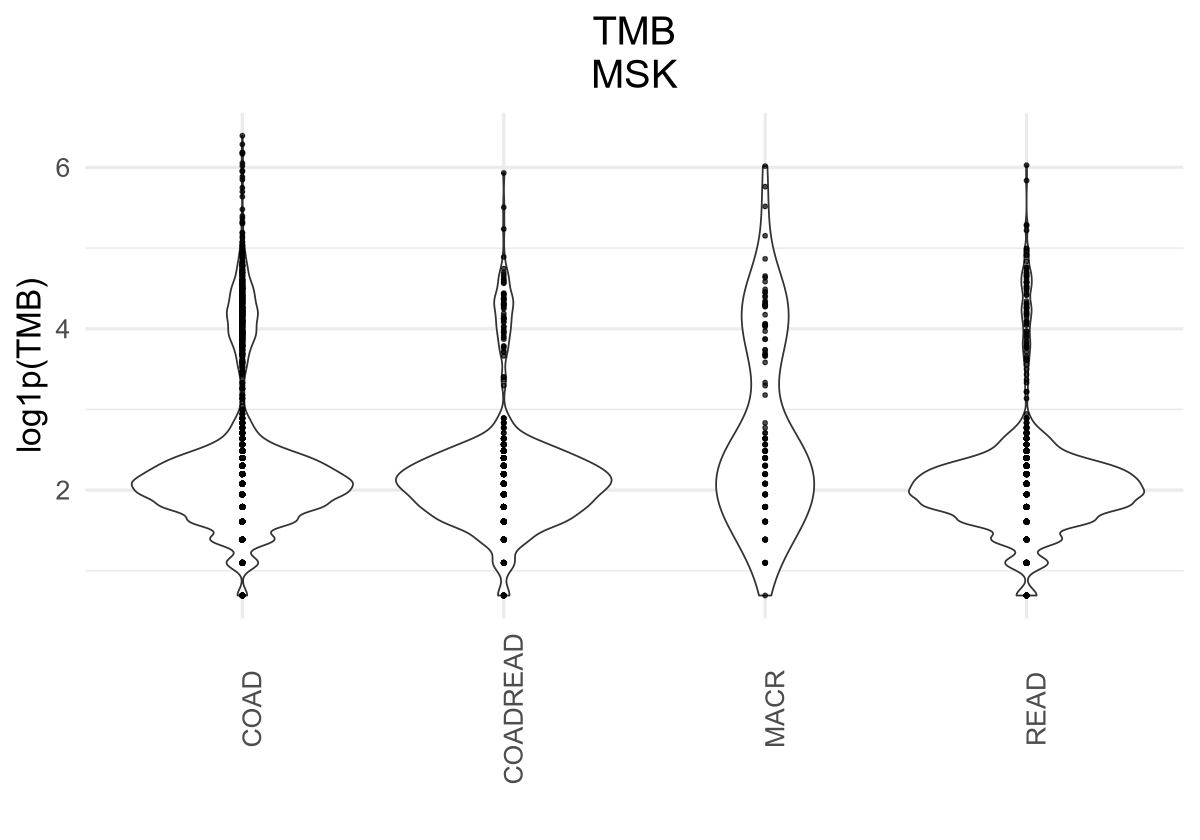

In [57]:
options(repr.plot.width = 10,repr.plot.height = 7)
ggplot(tmb_df %>% filter(tumor_type=='Colorectal Cancer'), aes(x = category, y = log10_TMB)) +
  geom_violin() +
  geom_point(color = "black", size = 1, alpha = 0.7)+
  #geom_point(aes(x = category, y = mean_value, shape = "Mean"), data = mean_data, color = "red", size = 4, alpha = 0.7) +
  #geom_point(aes(x = category, y = mean_value, shape = "Mean"), data = mean_data, color = "red", size = 5, fill = "red") +
  labs(title = "TMB\nMSK", x = "", y = "log1p(TMB)") +
  scale_shape_manual(values = c("Mean" = 15)) +
  theme_minimal(base_size = 20)+theme(plot.title = element_text(hjust = 0.5),axis.text.x = element_text(angle = 90))

In [58]:
crc_cutoff<-3

## Setting a cutoff for Endometrial samples

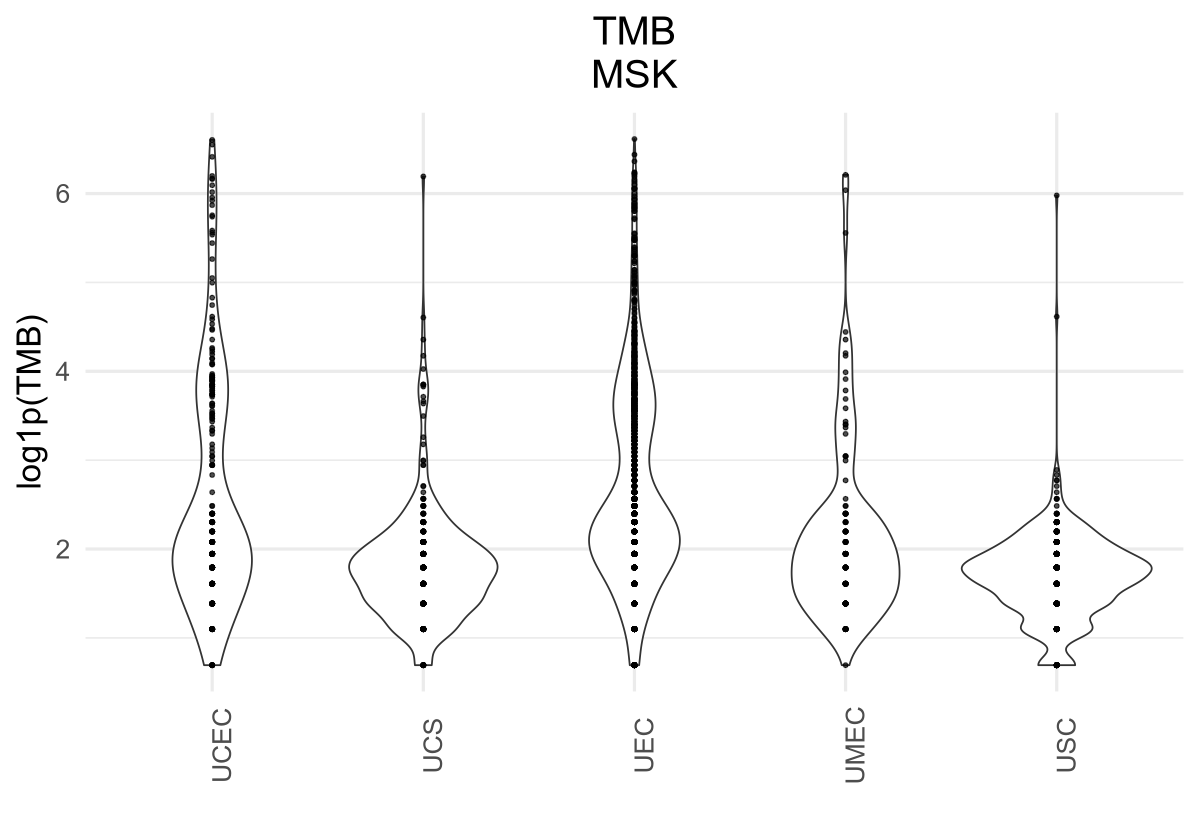

In [59]:
options(repr.plot.width = 10,repr.plot.height = 7)
ggplot(tmb_df %>% filter(tumor_type=='Endometrial Cancer'), aes(x = category, y = log10_TMB)) +
  geom_violin() +
  geom_point(color = "black", size = 1, alpha = 0.7)+
  #geom_point(aes(x = category, y = mean_value, shape = "Mean"), data = mean_data, color = "red", size = 4, alpha = 0.7) +
  #geom_point(aes(x = category, y = mean_value, shape = "Mean"), data = mean_data, color = "red", size = 5, fill = "red") +
  labs(title = "TMB\nMSK", x = "", y = "log1p(TMB)") +
  scale_shape_manual(values = c("Mean" = 15)) +
  theme_minimal(base_size = 20)+theme(plot.title = element_text(hjust = 0.5),axis.text.x = element_text(angle = 90))

In [60]:
ucec_cutoff<-3

In [61]:
head(tmb_df)

Tumor_Sample_Barcode,n,category,log10_TMB,Ordered_Number,tumor_type
<chr>,<int>,<chr>,<dbl>,<int>,<chr>
GENIE-MSK-P-0000027-T01-IM3,1,PLEMESO,0.6931472,1,Mesothelioma
GENIE-MSK-P-0000042-T01-IM3,1,PLEMESO,0.6931472,2,Mesothelioma
GENIE-MSK-P-0000058-T01-IM3,1,IDC,0.6931472,1,Breast Cancer
GENIE-MSK-P-0000098-T01-IM3,1,IDC,0.6931472,2,Breast Cancer
GENIE-MSK-P-0000100-T02-IM3,1,MGCT,0.6931472,1,Germ Cell Tumor
GENIE-MSK-P-0000129-T01-IM3,1,IDC,0.6931472,3,Breast Cancer


In [62]:
options(repr.matrix.max.rows = 100, repr.matrix.max.cols = Inf, repr.vector.max.length = 10)
tmb_df %>% count(tumor_type) %>% arrange(tumor_type) 

category,tumor_type,n
<chr>,<chr>,<int>
ANSC,Anal Cancer,150
APAD,Appendiceal Cancer,120
MAAP,Appendiceal Cancer,146
BLL,B-Lymphoblastic Leukemia/Lymphoma,147
BLCA,Bladder Cancer,1484
UTUC,Bladder Cancer,262
OS,Bone Cancer,117
BRCA,Breast Cancer,1013
BRCANOS,Breast Cancer,143


## Setting unclassified BRCA samples into IDC or ILC using CDH1 status

In [63]:
# Reading CNA status file
genie_cna <- read.table('../data/raw/genie/data_CNA.txt', header = TRUE, row.names = 1, sep = "\t", check.names = FALSE)

In [64]:
dim(genie_cna)

[1]   1000 130124

In [65]:
genie_cna[1:10,1:10]

,GENIE-DFCI-002910-3355,GENIE-DFCI-003035-3760,GENIE-DFCI-003337-817,GENIE-DFCI-001601-3485,GENIE-DFCI-000578-250,GENIE-DFCI-004466-422,GENIE-DFCI-004327-47,GENIE-DFCI-003498-202,GENIE-DFCI-002153-155,GENIE-DFCI-004280-289
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ABCB11,0,0,0,0,0,0,0,0,0,0
ABL1,0,0,0,1,0,0,0,0,0,0
ABL2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ACTB,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ACTG1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ACVR1,0,0,0,0,0,0,0,0,0,0
ACVR1B,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ACVRL1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AFF2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [66]:
breast_sample_to_annotate<-(tmb_df %>% filter(category %in% c('BRCA','BRCANOS','BRCNOS')))$Tumor_Sample_Barcode

In [67]:
breast_sample_to_annotate_ilc<-rownames(as.data.frame(t(data.frame(genie_cna['CDH1',breast_sample_to_annotate],check.names = FALSE))) %>% filter(CDH1<=-1))
breast_sample_to_annotate_idc<-rownames(as.data.frame(t(data.frame(genie_cna['CDH1',breast_sample_to_annotate],check.names = FALSE))) %>% filter(CDH1>=0))

In [68]:
head(tmb_df)

Tumor_Sample_Barcode,n,category,log10_TMB,Ordered_Number,tumor_type
<chr>,<int>,<chr>,<dbl>,<int>,<chr>
GENIE-MSK-P-0000027-T01-IM3,1,PLEMESO,0.6931472,1,Mesothelioma
GENIE-MSK-P-0000042-T01-IM3,1,PLEMESO,0.6931472,2,Mesothelioma
GENIE-MSK-P-0000058-T01-IM3,1,IDC,0.6931472,1,Breast Cancer
GENIE-MSK-P-0000098-T01-IM3,1,IDC,0.6931472,2,Breast Cancer
GENIE-MSK-P-0000100-T02-IM3,1,MGCT,0.6931472,1,Germ Cell Tumor
GENIE-MSK-P-0000129-T01-IM3,1,IDC,0.6931472,3,Breast Cancer


In [69]:
tmb_df<-tmb_df %>% mutate(new_category=case_when((tumor_type=='Colorectal Cancer' & log10_TMB>=3) ~ 'CRC_HM',
                                         (tumor_type=='Colorectal Cancer' & log10_TMB<3) ~ 'CRC_LM',
                                         (tumor_type=='Endometrial Cancer' & log10_TMB>=3 & category %notin%c('USC','UCS')) ~ 'UCEC_HM',
                                         (tumor_type=='Endometrial Cancer' & log10_TMB<3 & category %notin%c('USC','UCS')) ~ 'UCEC_LM',
                                         (tumor_type=='Glioma'  & category %in% c('AASTR','ASTR','ODG')) ~ 'Glioma_low_grade',                                                 
                                         (tumor_type=='Glioma'  & category %in% c('GB','GBM')) ~ 'GBM',
                                         (tumor_type=='Head and Neck Cancer') ~ 'HNSC',
                                         (tumor_type=='Renal Cell Carcinoma') ~ 'RCC',
                                         (tumor_type=='Melanoma' & category %in% c('MEL','SKCM','MUP')) ~ 'MEL',
                                         (tumor_type=='Breast Cancer' & Tumor_Sample_Barcode %in% breast_sample_to_annotate_ilc) ~ 'ILC',
                                         (tumor_type=='Breast Cancer' & Tumor_Sample_Barcode %in% breast_sample_to_annotate_idc) ~ 'IDC',
                                         (tumor_type=='Esophagogastric Cancer' & category %in% c('EGC','GEJ')) ~ 'ESCA',
                                         TRUE ~ category                                        
                                        ))

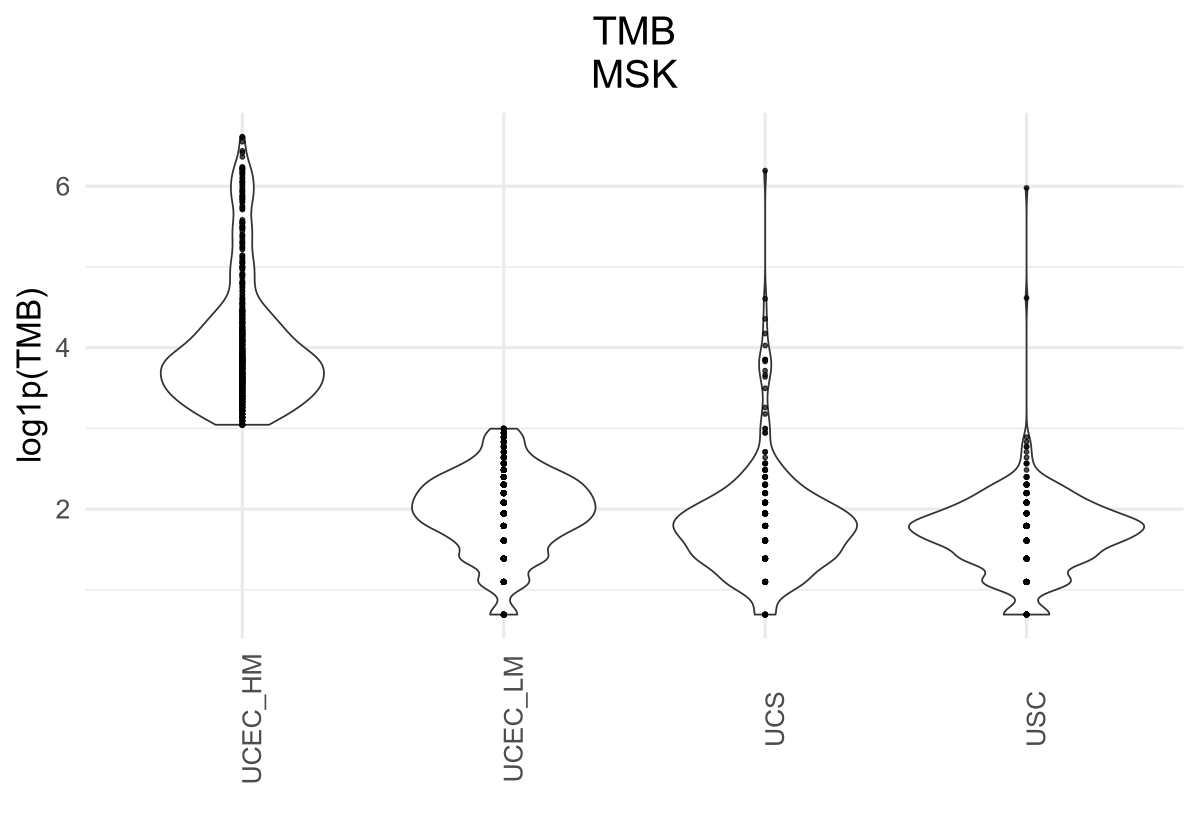

In [70]:
options(repr.plot.width = 10,repr.plot.height = 7)
ggplot(tmb_df %>% filter(tumor_type=='Endometrial Cancer'), aes(x = new_category, y = log10_TMB)) +
  geom_violin() +
  geom_point(color = "black", size = 1, alpha = 0.7)+
  #geom_point(aes(x = category, y = mean_value, shape = "Mean"), data = mean_data, color = "red", size = 4, alpha = 0.7) +
  #geom_point(aes(x = category, y = mean_value, shape = "Mean"), data = mean_data, color = "red", size = 5, fill = "red") +
  labs(title = "TMB\nMSK", x = "", y = "log1p(TMB)") +
  scale_shape_manual(values = c("Mean" = 15)) +
  theme_minimal(base_size = 20)+theme(plot.title = element_text(hjust = 0.5),axis.text.x = element_text(angle = 90))

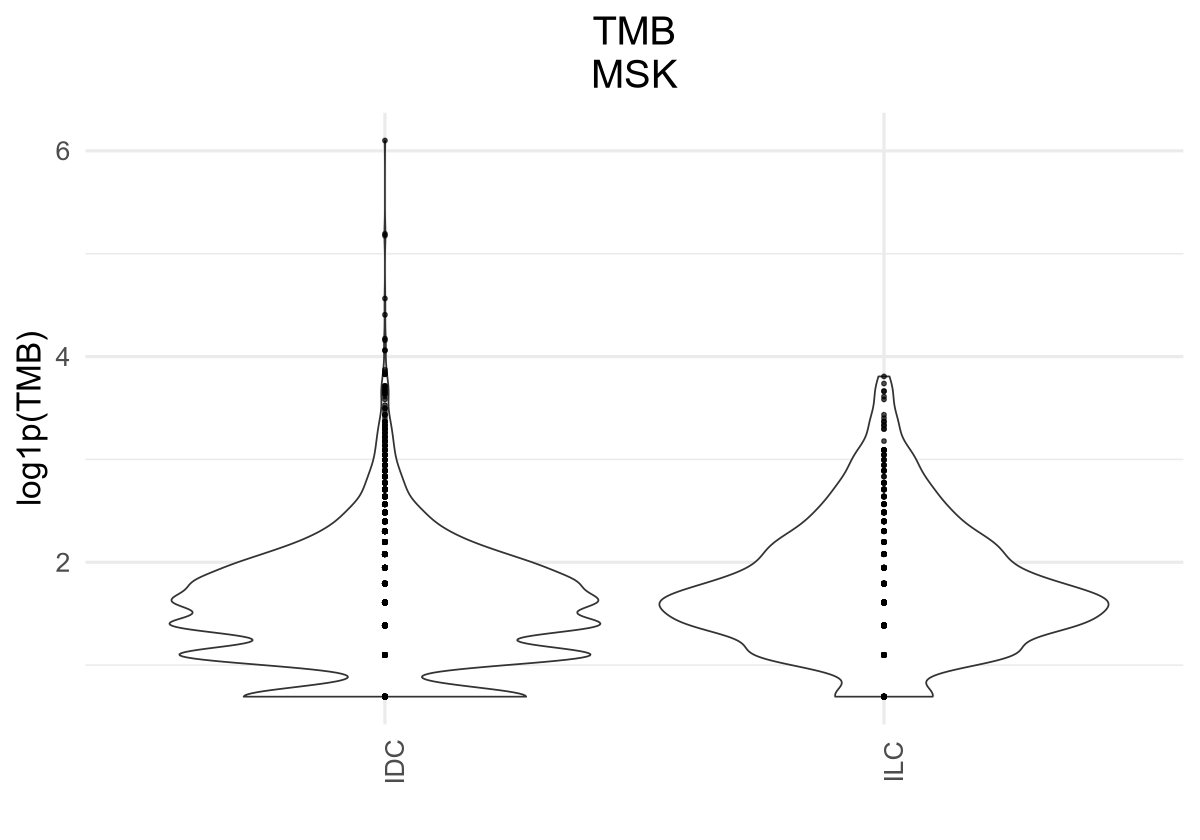

In [71]:
options(repr.plot.width = 10,repr.plot.height = 7)
ggplot(tmb_df %>% filter(tumor_type=='Breast Cancer'), aes(x = new_category, y = log10_TMB)) +
  geom_violin() +
  geom_point(color = "black", size = 1, alpha = 0.7)+
  #geom_point(aes(x = category, y = mean_value, shape = "Mean"), data = mean_data, color = "red", size = 4, alpha = 0.7) +
  #geom_point(aes(x = category, y = mean_value, shape = "Mean"), data = mean_data, color = "red", size = 5, fill = "red") +
  labs(title = "TMB\nMSK", x = "", y = "log1p(TMB)") +
  scale_shape_manual(values = c("Mean" = 15)) +
  theme_minimal(base_size = 20)+theme(plot.title = element_text(hjust = 0.5),axis.text.x = element_text(angle = 90))

In [72]:
head(tmb_df)

Tumor_Sample_Barcode,n,category,log10_TMB,Ordered_Number,tumor_type,new_category
<chr>,<int>,<chr>,<dbl>,<int>,<chr>,<chr>
GENIE-MSK-P-0000027-T01-IM3,1,PLEMESO,0.6931472,1,Mesothelioma,PLEMESO
GENIE-MSK-P-0000042-T01-IM3,1,PLEMESO,0.6931472,2,Mesothelioma,PLEMESO
GENIE-MSK-P-0000058-T01-IM3,1,IDC,0.6931472,1,Breast Cancer,IDC
GENIE-MSK-P-0000098-T01-IM3,1,IDC,0.6931472,2,Breast Cancer,IDC
GENIE-MSK-P-0000100-T02-IM3,1,MGCT,0.6931472,1,Germ Cell Tumor,MGCT
GENIE-MSK-P-0000129-T01-IM3,1,IDC,0.6931472,3,Breast Cancer,IDC


In [73]:
tmb_df<-tmb_df %>% mutate(new_tumor_run_group = case_when(category %in% c('HCC') ~'Liver Cancer',
                                                         category %in% c('GBAD','GBC','CHOL','IHCH','EHCH','PHCH') ~ 'Billary Tract Cancer',
                                                         TRUE  ~ tumor_type))

In [74]:
head(tmb_df)

Tumor_Sample_Barcode,n,category,log10_TMB,Ordered_Number,tumor_type,new_category,new_tumor_run_group
<chr>,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>
GENIE-MSK-P-0000027-T01-IM3,1,PLEMESO,0.6931472,1,Mesothelioma,PLEMESO,Mesothelioma
GENIE-MSK-P-0000042-T01-IM3,1,PLEMESO,0.6931472,2,Mesothelioma,PLEMESO,Mesothelioma
GENIE-MSK-P-0000058-T01-IM3,1,IDC,0.6931472,1,Breast Cancer,IDC,Breast Cancer
GENIE-MSK-P-0000098-T01-IM3,1,IDC,0.6931472,2,Breast Cancer,IDC,Breast Cancer
GENIE-MSK-P-0000100-T02-IM3,1,MGCT,0.6931472,1,Germ Cell Tumor,MGCT,Germ Cell Tumor
GENIE-MSK-P-0000129-T01-IM3,1,IDC,0.6931472,3,Breast Cancer,IDC,Breast Cancer


In [76]:
head(genie_metadata_15_msk_with_mutation_selected_final_freeze,2)

,PATIENT_ID,SEX,PRIMARY_RACE,ETHNICITY,CENTER,INT_CONTACT,INT_DOD,YEAR_CONTACT,DEAD,YEAR_DEATH,SAMPLE_ID,AGE_AT_SEQ_REPORT,ONCOTREE_CODE,SAMPLE_TYPE,SEQ_ASSAY_ID,CANCER_TYPE,CANCER_TYPE_DETAILED,SAMPLE_TYPE_DETAILED
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,GENIE-MSK-P-0000004,Female,White,Non-Spanish/non-Hispanic,MSK,14631,14631,2014,TRUE,2014,GENIE-MSK-P-0000004-T01-IM3,39,IDC,Primary,MSK-IMPACT341,Breast Cancer,Breast Invasive Ductal Carcinoma,Primary tumor
2,GENIE-MSK-P-0000015,Female,White,Non-Spanish/non-Hispanic,MSK,16656,16656,2015,TRUE,2015,GENIE-MSK-P-0000015-T01-IM3,44,IDC,Metastasis,MSK-IMPACT341,Breast Cancer,Breast Invasive Ductal Carcinoma,Metastasis site unspecified


In [77]:
sample_annotaion <- tmb_df$new_category
names(sample_annotaion)<-tmb_df$Tumor_Sample_Barcode

In [78]:
genie_metadata_15_msk_with_mutation_selected_final_atleast_100_samples<-genie_metadata_15_msk_with_mutation_selected_final_freeze %>% mutate(final_class=sample_annotaion[SAMPLE_ID])

In [79]:
head(genie_metadata_15_msk_with_mutation_selected_final_atleast_100_samples,2)

,PATIENT_ID,SEX,PRIMARY_RACE,ETHNICITY,CENTER,INT_CONTACT,INT_DOD,YEAR_CONTACT,DEAD,YEAR_DEATH,SAMPLE_ID,AGE_AT_SEQ_REPORT,ONCOTREE_CODE,SAMPLE_TYPE,SEQ_ASSAY_ID,CANCER_TYPE,CANCER_TYPE_DETAILED,SAMPLE_TYPE_DETAILED,final_class
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,GENIE-MSK-P-0000004,Female,White,Non-Spanish/non-Hispanic,MSK,14631,14631,2014,TRUE,2014,GENIE-MSK-P-0000004-T01-IM3,39,IDC,Primary,MSK-IMPACT341,Breast Cancer,Breast Invasive Ductal Carcinoma,Primary tumor,IDC
2,GENIE-MSK-P-0000015,Female,White,Non-Spanish/non-Hispanic,MSK,16656,16656,2015,TRUE,2015,GENIE-MSK-P-0000015-T01-IM3,44,IDC,Metastasis,MSK-IMPACT341,Breast Cancer,Breast Invasive Ductal Carcinoma,Metastasis site unspecified,IDC


In [80]:
sample_annotaion <- tmb_df$new_tumor_run_group
names(sample_annotaion)<-tmb_df$Tumor_Sample_Barcode

In [81]:
genie_metadata_15_msk_with_mutation_selected_final_atleast_100_samples<-genie_metadata_15_msk_with_mutation_selected_final_atleast_100_samples %>% mutate(final_run_group=sample_annotaion[SAMPLE_ID])

In [82]:
head(genie_metadata_15_msk_with_mutation_selected_final_atleast_100_samples,2)

,PATIENT_ID,SEX,PRIMARY_RACE,ETHNICITY,CENTER,INT_CONTACT,INT_DOD,YEAR_CONTACT,DEAD,YEAR_DEATH,SAMPLE_ID,AGE_AT_SEQ_REPORT,ONCOTREE_CODE,SAMPLE_TYPE,SEQ_ASSAY_ID,CANCER_TYPE,CANCER_TYPE_DETAILED,SAMPLE_TYPE_DETAILED,final_class,final_run_group
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,GENIE-MSK-P-0000004,Female,White,Non-Spanish/non-Hispanic,MSK,14631,14631,2014,TRUE,2014,GENIE-MSK-P-0000004-T01-IM3,39,IDC,Primary,MSK-IMPACT341,Breast Cancer,Breast Invasive Ductal Carcinoma,Primary tumor,IDC,Breast Cancer
2,GENIE-MSK-P-0000015,Female,White,Non-Spanish/non-Hispanic,MSK,16656,16656,2015,TRUE,2015,GENIE-MSK-P-0000015-T01-IM3,44,IDC,Metastasis,MSK-IMPACT341,Breast Cancer,Breast Invasive Ductal Carcinoma,Metastasis site unspecified,IDC,Breast Cancer


In [83]:
msk_count<-genie_metadata_15_msk_with_mutation_selected_final_atleast_100_samples %>% count(final_run_group,final_class) %>% arrange(desc(n))

In [84]:
head(msk_count)

,final_run_group,final_class,n
,<chr>,<chr>,<int>
1,Colorectal Cancer,CRC_LM,5025
2,Non-Small Cell Lung Cancer,LUAD,4829
3,Breast Cancer,IDC,4614
4,Pancreatic Cancer,PAAD,2927
5,Prostate Cancer,PRAD,2784
6,Ovarian Cancer,HGSOC,1598


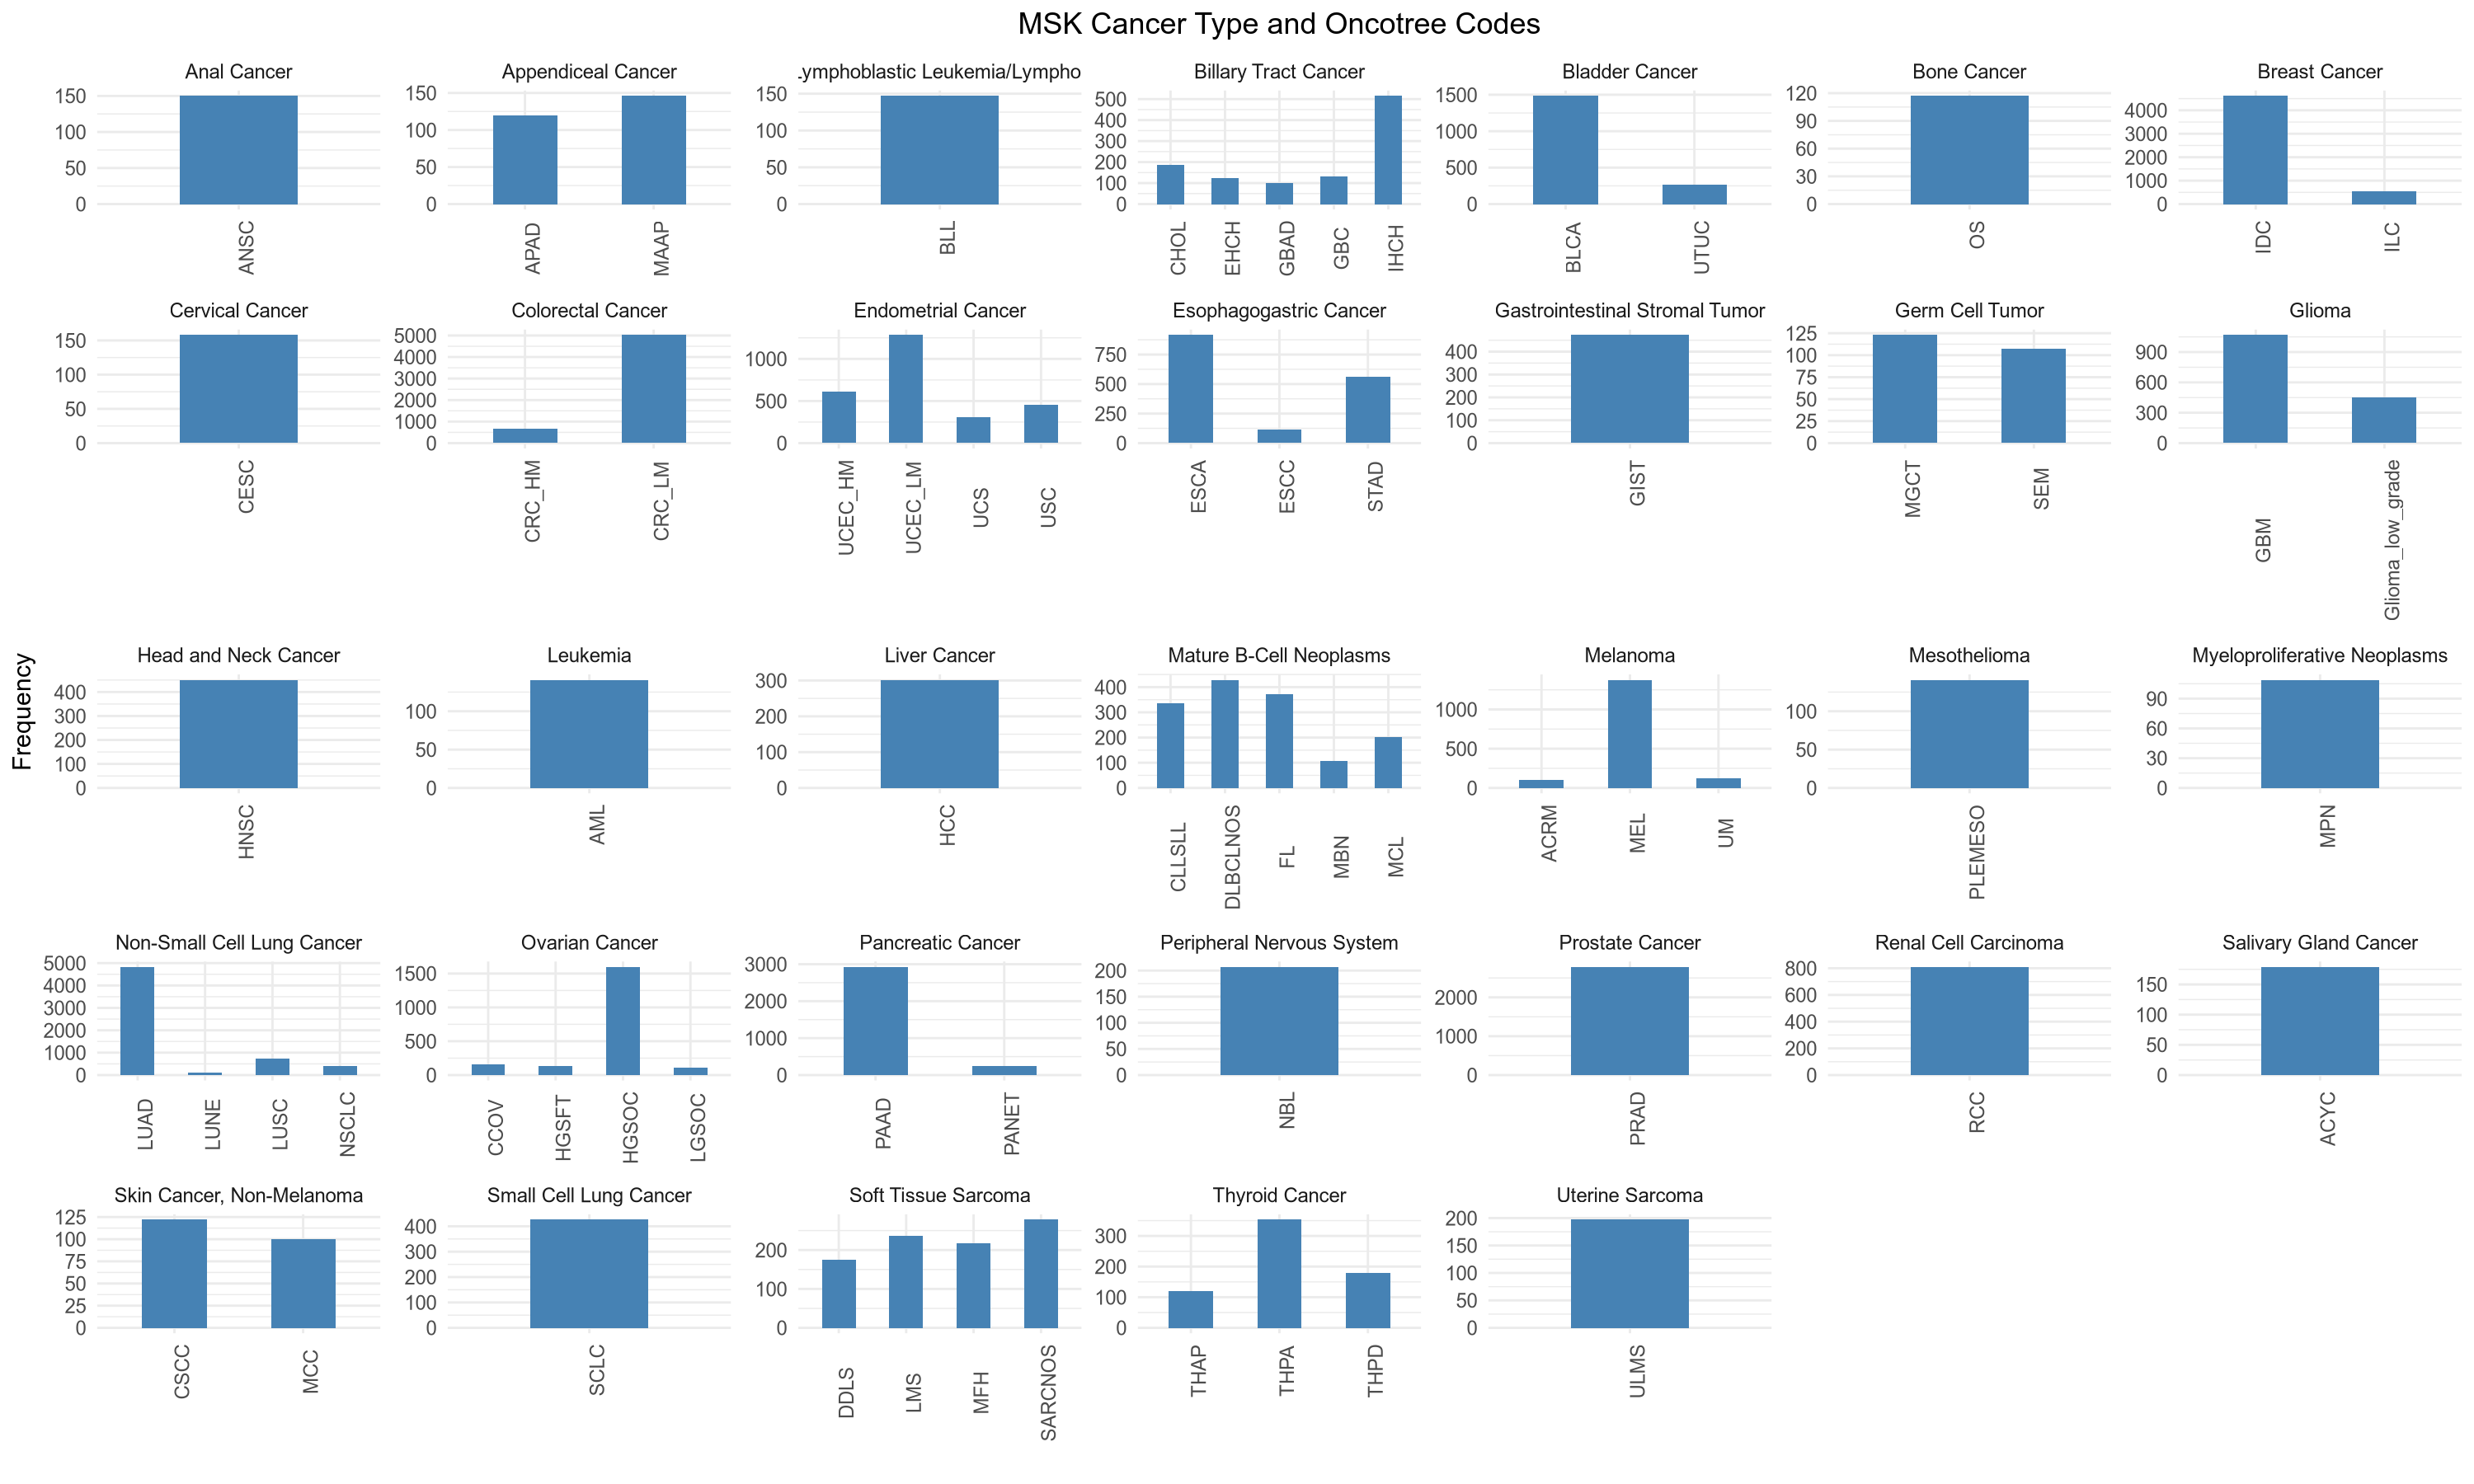

In [85]:
# Create a bar plot faceted by group
options(repr.plot.width = 25,repr.plot.height = 15)
ggplot(msk_count, aes(x = final_class, y = n)) +
  geom_bar(stat = "identity", fill = "steelblue",width = 0.5) +
  #geom_text(aes(label = n), vjust = -0.5) +
  facet_wrap(~ final_run_group, nrow = 7,ncol=7,scales="free") +
  labs(title = "MSK Cancer Type and Oncotree Codes",x='',y = "Frequency") +
  theme_minimal(base_size = 18)+theme(plot.title = element_text(hjust = 0.5),axis.text.x = element_text(angle = 90))

In [192]:
# Save the annotation file
saveRDS(genie_metadata_15_msk_with_mutation_selected_final_atleast_100_samples,file='../data/processed/msk_one_patient_one_sample_final.rds')

# DFCI Cohort Filtering and annotations

## Filtering

In [86]:
genie_metadata_15_dfci <- genie_metadata %>% filter(CENTER=='DFCI')

In [87]:
dim(genie_metadata_15_dfci)

[1] 35366    18

In [88]:
length(unique(genie_metadata_15_dfci$PATIENT_ID))
length(unique(genie_metadata_15_dfci$SAMPLE_ID))

[1] 33382

[1] 35366

In [89]:
head(genie_metadata_15_dfci$SAMPLE_ID)

[1] "GENIE-DFCI-001930-3071"   "GENIE-DFCI-001930-664173"
[3] "GENIE-DFCI-001296-2850"   "GENIE-DFCI-000145-3971"  
[5] "GENIE-DFCI-007383-3930"   "GENIE-DFCI-001863-2555"

In [90]:
genie_maf_dfci <- genie_maf %>% select(Chromosome,Start_Position,End_Position,Hugo_Symbol,Variant_Classification,Tumor_Sample_Barcode,HGVSp_Short) %>%
filter(Tumor_Sample_Barcode %in% genie_metadata_15_dfci$SAMPLE_ID)

In [91]:
genie_metadata_15_dfci_with_mutation<-genie_metadata_15_dfci %>% filter(SAMPLE_ID %in% unique(genie_maf_dfci$Tumor_Sample_Barcode))

In [92]:
length(unique(genie_metadata_15_dfci_with_mutation$PATIENT_ID))
length(unique(genie_metadata_15_dfci_with_mutation$SAMPLE_ID))

[1] 32980

[1] 34891

In [93]:
head(genie_metadata_15_dfci_with_mutation,2)

,PATIENT_ID,SEX,PRIMARY_RACE,ETHNICITY,CENTER,INT_CONTACT,INT_DOD,YEAR_CONTACT,DEAD,YEAR_DEATH,SAMPLE_ID,AGE_AT_SEQ_REPORT,ONCOTREE_CODE,SAMPLE_TYPE,SEQ_ASSAY_ID,CANCER_TYPE,CANCER_TYPE_DETAILED,SAMPLE_TYPE_DETAILED
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,GENIE-DFCI-001930,Female,White,Non-Spanish/non-Hispanic,DFCI,20825,20825,2018,True,2018,GENIE-DFCI-001930-3071,53,LUAD,Primary,DFCI-ONCOPANEL-1,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Primary tumor
2,GENIE-DFCI-001930,Female,White,Non-Spanish/non-Hispanic,DFCI,20825,20825,2018,True,2018,GENIE-DFCI-001930-664173,56,LUAD,Primary,DFCI-ONCOPANEL-3,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Primary tumor


In [94]:
genie_metadata_15_dfci_with_mutation <- genie_metadata_15_dfci_with_mutation %>% filter(SAMPLE_TYPE %in% c('Metastasis','Primary'))

In [95]:
length(unique(genie_metadata_15_dfci_with_mutation$PATIENT_ID))
length(unique(genie_metadata_15_dfci_with_mutation$SAMPLE_ID))

[1] 30539

[1] 32255

In [96]:
genie_metadata_15_dfci_with_mutation %>% filter(SAMPLE_TYPE %in% c('Metastasis','Primary')) %>% dim

[1] 32255    18

In [97]:
dfci_one_sample_one_pateint<-(genie_metadata_15_dfci_with_mutation %>% select(PATIENT_ID,SAMPLE_ID) %>% distinct() %>% group_by(PATIENT_ID) %>%
filter(n()==1) %>% ungroup())$SAMPLE_ID

In [98]:
length(dfci_one_sample_one_pateint)

[1] 29051

In [99]:
genie_metadata_15_dfci_with_mutation %>% count(PATIENT_ID) %>% count(n,name='freq') %>% filter(n>1) %>% sum

[1] 1508

In [100]:
onco_codes_gt_30<-(genie_metadata_15_dfci_with_mutation %>% filter(SAMPLE_ID %in% dfci_one_sample_one_pateint) %>% group_by(ONCOTREE_CODE) %>% 
filter(all(c("Primary", "Metastasis") %in% SAMPLE_TYPE)) %>% count(ONCOTREE_CODE,SAMPLE_TYPE)  %>% 
pivot_wider(names_from =  'SAMPLE_TYPE',id_cols = 'ONCOTREE_CODE',values_from = 'n') %>% filter(Metastasis>=30 | Primary>=30))$ONCOTREE_CODE

In [101]:
length(onco_codes_gt_30)

[1] 100

In [102]:
onco_codes_gt_30_selected <- (genie_metadata_15_dfci_with_mutation %>% filter(SAMPLE_ID %in% dfci_one_sample_one_pateint) %>% filter(ONCOTREE_CODE %in% onco_codes_gt_30) %>% 
filter(CANCER_TYPE %notin% c('UNKNOWN','Cancer of Unknown Primary')) %>% select(ONCOTREE_CODE) %>% distinct())$ONCOTREE_CODE

In [103]:
genie_metadata_15_dfci_with_mutation_selected_final<-genie_metadata_15_dfci_with_mutation %>% filter(SAMPLE_ID %in% dfci_one_sample_one_pateint) %>%
                                              filter(ONCOTREE_CODE %in% onco_codes_gt_30_selected)

In [104]:
dim(genie_metadata_15_dfci_with_mutation)
dim(genie_metadata_15_dfci_with_mutation_selected_final)

[1] 32255    18

[1] 24888    18

In [105]:
dfci_count<-genie_metadata_15_dfci_with_mutation_selected_final %>% count(CANCER_TYPE,ONCOTREE_CODE) %>% arrange(desc(n))

In [106]:
head(dfci_count)

,CANCER_TYPE,ONCOTREE_CODE,n
,<chr>,<chr>,<int>
1,Non-Small Cell Lung Cancer,LUAD,2901
2,Colorectal Cancer,COAD,2234
3,Pancreatic Cancer,PAAD,1319
4,Breast Cancer,IDC,1295
5,Glioma,GB,1178
6,Breast Cancer,BRCA,1003


In [107]:
consider_codes<-(dfci_count %>% filter(n>=100))$ONCOTREE_CODE

In [108]:
genie_metadata_15_dfci_with_mutation_selected_final_atleast_100_samples <- genie_metadata_15_dfci_with_mutation_selected_final %>% filter(ONCOTREE_CODE %in% consider_codes) 

In [109]:
dim(genie_metadata_15_dfci_with_mutation_selected_final_atleast_100_samples)

[1] 22313    18

In [110]:
dfci_count<-genie_metadata_15_dfci_with_mutation_selected_final_atleast_100_samples %>% count(CANCER_TYPE,ONCOTREE_CODE) %>% arrange(desc(n))

In [111]:
head(dfci_count)

,CANCER_TYPE,ONCOTREE_CODE,n
,<chr>,<chr>,<int>
1,Non-Small Cell Lung Cancer,LUAD,2901
2,Colorectal Cancer,COAD,2234
3,Pancreatic Cancer,PAAD,1319
4,Breast Cancer,IDC,1295
5,Glioma,GB,1178
6,Breast Cancer,BRCA,1003


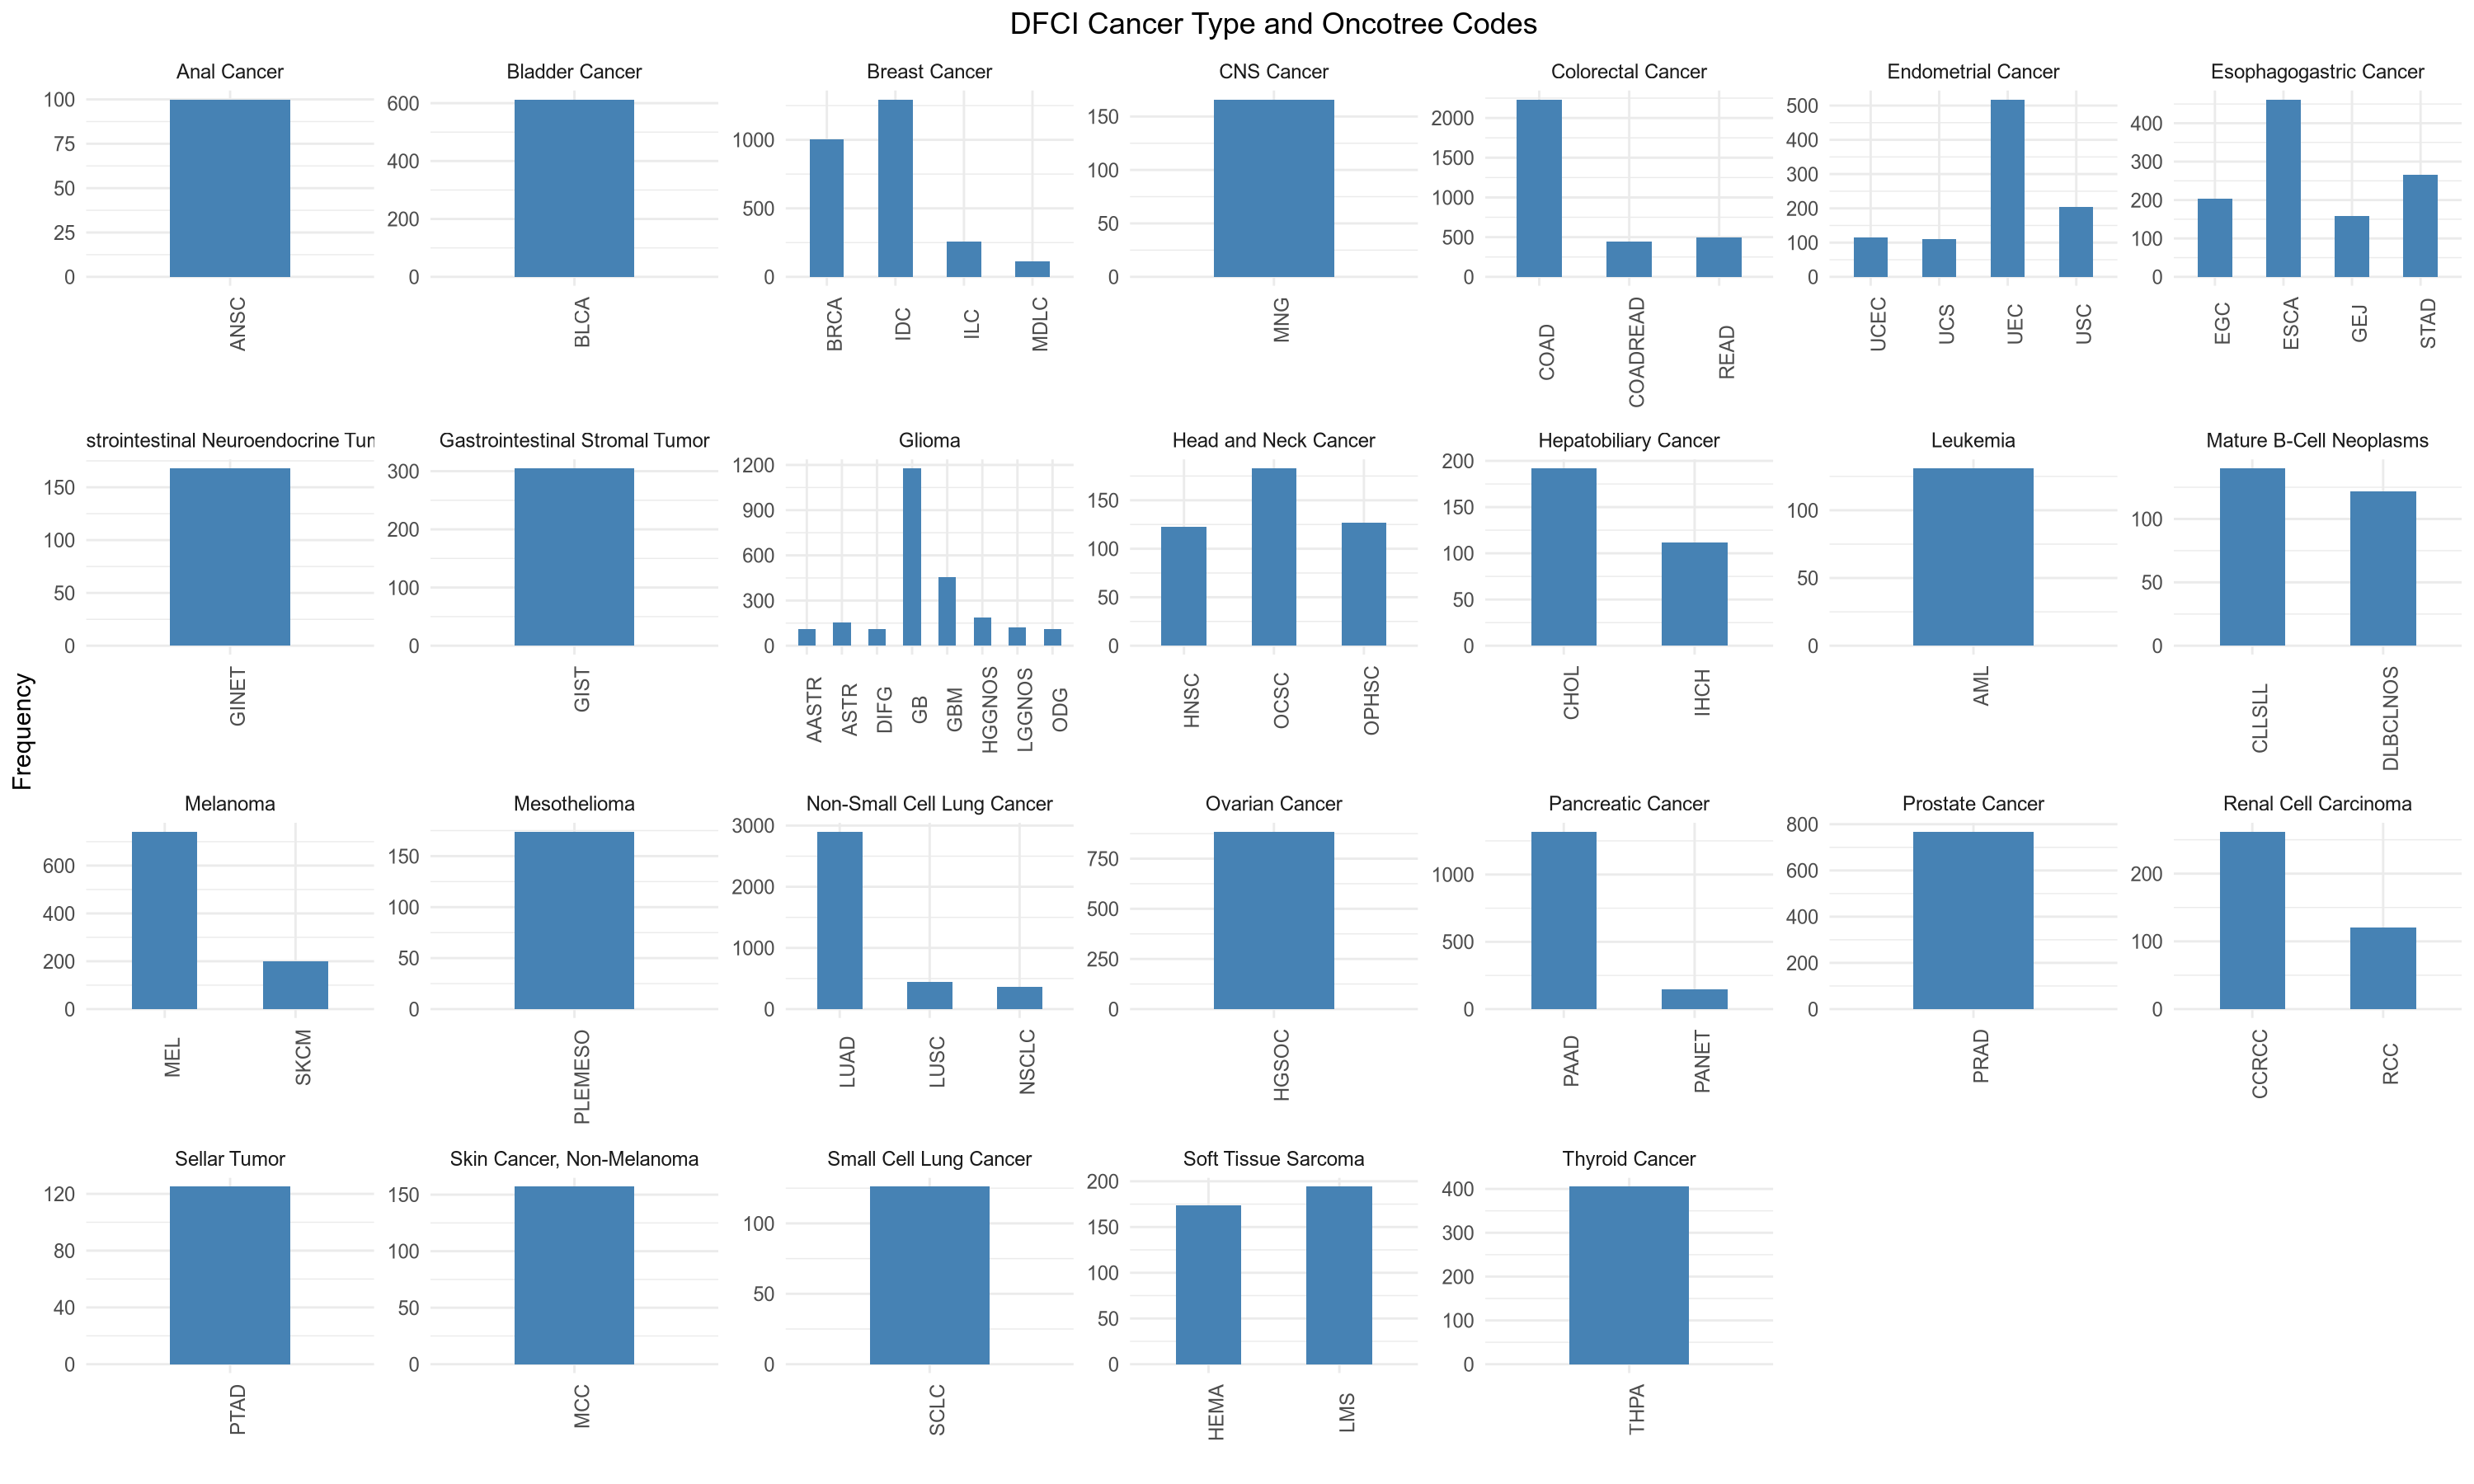

In [113]:
# Create a bar plot faceted by group
options(repr.plot.width = 25,repr.plot.height = 15)
ggplot(dfci_count, aes(x = ONCOTREE_CODE, y = n)) +
  geom_bar(stat = "identity", fill = "steelblue",width = 0.5) +
  #geom_text(aes(label = n), vjust = -0.5) +
  facet_wrap(~ CANCER_TYPE, nrow = 7,ncol=7,scales="free") +
  labs(title = "DFCI Cancer Type and Oncotree Codes",x='',y = "Frequency") +
  theme_minimal(base_size = 18)+theme(plot.title = element_text(hjust = 0.5),axis.text.x = element_text(angle = 90))

In [114]:
head(genie_metadata_15_dfci_with_mutation_selected_final_atleast_100_samples)

,PATIENT_ID,SEX,PRIMARY_RACE,ETHNICITY,CENTER,INT_CONTACT,INT_DOD,YEAR_CONTACT,DEAD,YEAR_DEATH,SAMPLE_ID,AGE_AT_SEQ_REPORT,ONCOTREE_CODE,SAMPLE_TYPE,SEQ_ASSAY_ID,CANCER_TYPE,CANCER_TYPE_DETAILED,SAMPLE_TYPE_DETAILED
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,GENIE-DFCI-000145,Male,White,Non-Spanish/non-Hispanic,DFCI,26418,Not Applicable,2022,False,Not Applicable,GENIE-DFCI-000145-3971,64,LUAD,Metastasis,DFCI-ONCOPANEL-2,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Metastasis site unspecified
2,GENIE-DFCI-007383,Male,White,Non-Spanish/non-Hispanic,DFCI,23668,23673,2015,True,2015,GENIE-DFCI-007383-3930,64,LUAD,Metastasis,DFCI-ONCOPANEL-2,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Metastasis site unspecified
3,GENIE-DFCI-000018,Female,White,Non-Spanish/non-Hispanic,DFCI,30439,30507,2019,True,2019,GENIE-DFCI-000018-4015,79,BLCA,Primary,DFCI-ONCOPANEL-2,Bladder Cancer,Bladder Urothelial Carcinoma,Primary tumor
4,GENIE-DFCI-000544,Female,Unknown,Non-Spanish/non-Hispanic,DFCI,30363,30409,2015,True,2015,GENIE-DFCI-000544-5758,82,LUAD,Metastasis,DFCI-ONCOPANEL-2,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Metastasis site unspecified
5,GENIE-DFCI-003388,Female,White,Non-Spanish/non-Hispanic,DFCI,24047,24094,2015,True,2015,GENIE-DFCI-003388-5143,65,LUSC,Primary,DFCI-ONCOPANEL-2,Non-Small Cell Lung Cancer,Lung Squamous Cell Carcinoma,Primary tumor
6,GENIE-DFCI-001376,Female,White,Non-Spanish/non-Hispanic,DFCI,18736,Not Applicable,2023,False,Not Applicable,GENIE-DFCI-001376-5688,43,THPA,Primary,DFCI-ONCOPANEL-2,Thyroid Cancer,Papillary Thyroid Cancer,Primary tumor


## Setting a cutoff of  Endometrial and CRC samples

In [115]:
genie_maf_dfci <- genie_maf %>% select(Chromosome,Start_Position,End_Position,Hugo_Symbol,Variant_Classification,Tumor_Sample_Barcode,HGVSp_Short) %>%
filter(Tumor_Sample_Barcode %in% genie_metadata_15_dfci_with_mutation_selected_final_atleast_100_samples$SAMPLE_ID)

In [116]:
head(genie_maf_dfci)

,Chromosome,Start_Position,End_Position,Hugo_Symbol,Variant_Classification,Tumor_Sample_Barcode,HGVSp_Short
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,19,42777065,42777065,CIC,Missense_Mutation,GENIE-DFCI-183676-2518535,p.K377R
2,9,139399555,139399555,NOTCH1,Missense_Mutation,GENIE-DFCI-183676-2518535,p.P1530S
3,11,108163428,108163431,ATM,Frame_Shift_Del,GENIE-DFCI-183676-2518535,p.Y1508Vfs*5
4,8,41790280,41790280,KAT6A,Missense_Mutation,GENIE-DFCI-183676-2518535,p.T1820A
5,7,55233012,55233012,EGFR,Missense_Mutation,GENIE-DFCI-183676-2518535,p.G588S
6,11,94192612,94192612,MRE11A,Missense_Mutation,GENIE-DFCI-183676-2518535,p.R488C


In [117]:
samples_selected<-(genie_metadata_15_dfci_with_mutation_selected_final_atleast_100_samples)$ONCOTREE_CODE
names(samples_selected)<-(genie_metadata_15_dfci_with_mutation_selected_final_atleast_100_samples)$SAMPLE_ID

In [118]:
plot_df<-genie_maf_dfci %>% count(Tumor_Sample_Barcode) %>% filter(Tumor_Sample_Barcode %in% names(samples_selected)) %>% mutate('category'=samples_selected[Tumor_Sample_Barcode])

In [119]:
head(plot_df)

,Tumor_Sample_Barcode,n,category
,<chr>,<int>,<chr>
1,GENIE-DFCI-000002-3873,7,COADREAD
2,GENIE-DFCI-000003-4266,2,MNG
3,GENIE-DFCI-000005-354,2,GBM
4,GENIE-DFCI-000007-451,2,THPA
5,GENIE-DFCI-000008-3775,6,GINET
6,GENIE-DFCI-000010-9916,5,MCC


In [120]:
plot_df$log10_TMB <- log1p(plot_df$n)

In [121]:
mean_data <- plot_df %>%
  group_by(category) %>%
  summarise(mean_value = mean(log10_TMB))

In [122]:
head(mean_data)

category,mean_value
<chr>,<dbl>
AASTR,2.192272
AML,1.999675
ANSC,2.380023
ASTR,2.076323
BLCA,2.627788
BRCA,2.230910


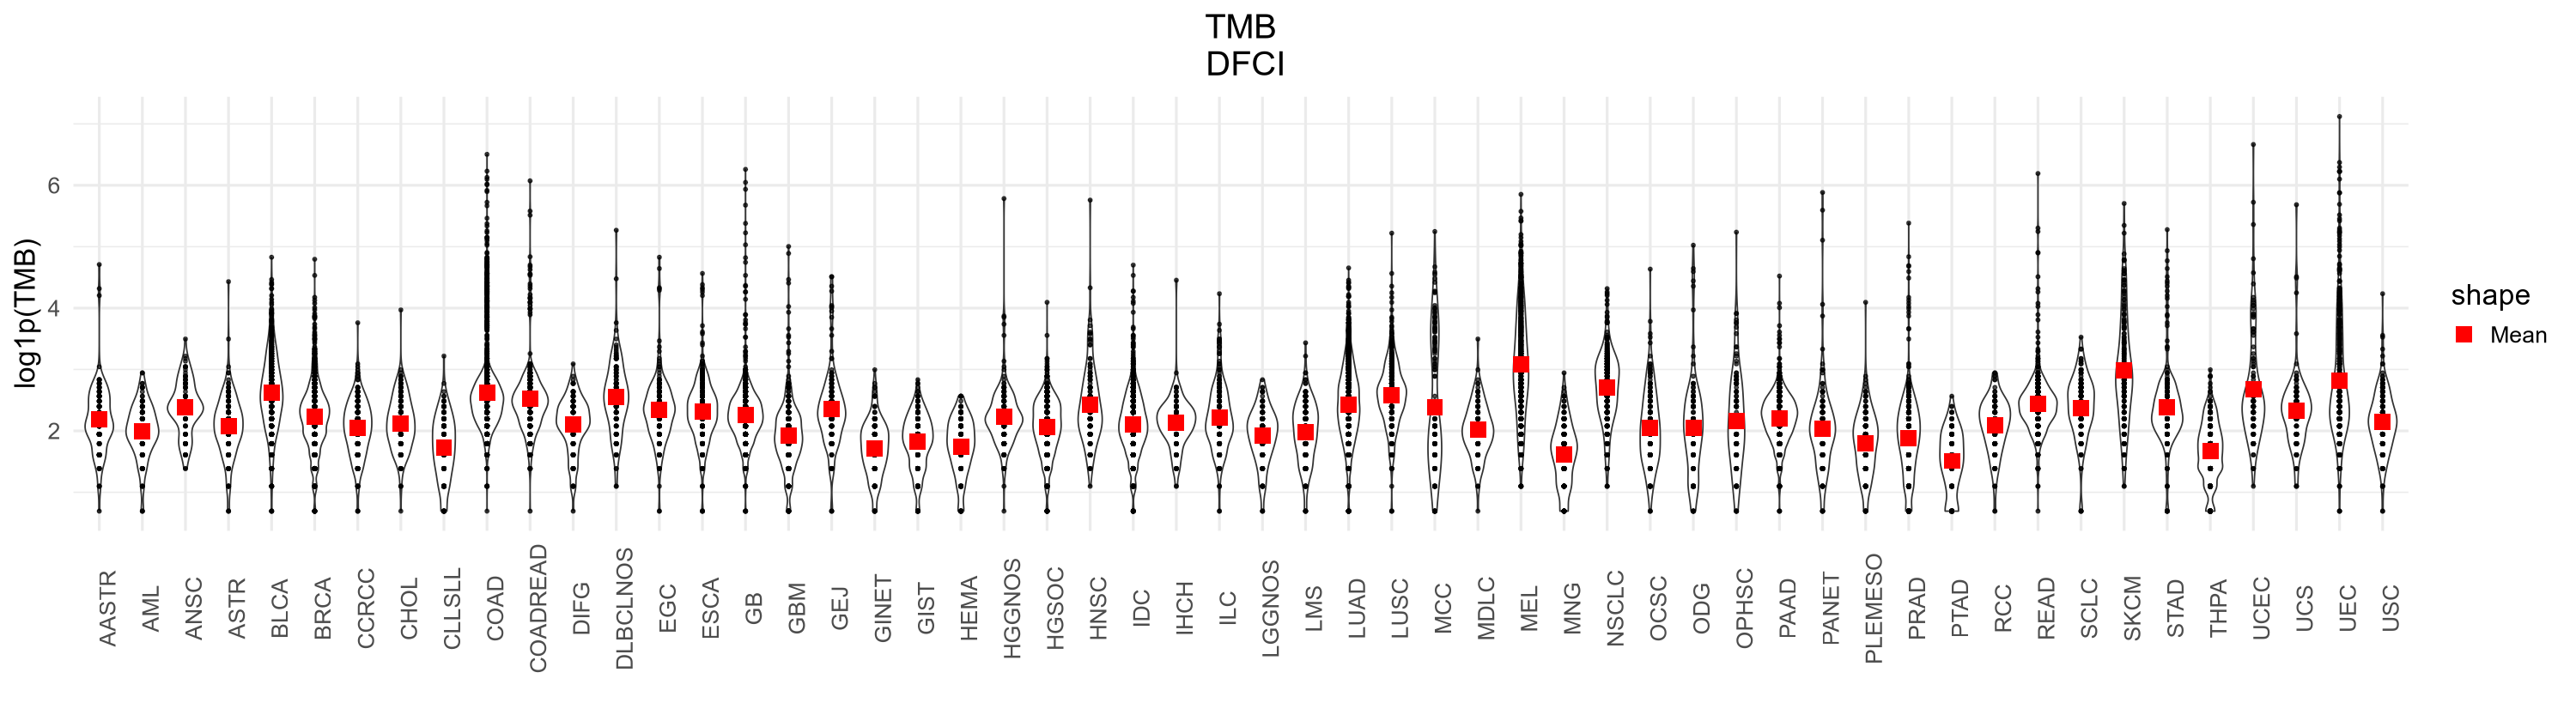

In [123]:
options(repr.plot.width = 25,repr.plot.height = 7)
ggplot(plot_df, aes(x = category, y = log10_TMB)) +
  geom_violin() +
  geom_point(color = "black", size = 1, alpha = 0.7)+
  geom_point(aes(x = category, y = mean_value, shape = "Mean"), data = mean_data, color = "red", size = 4, alpha = 0.7) +
  geom_point(aes(x = category, y = mean_value, shape = "Mean"), data = mean_data, color = "red", size = 5, fill = "red") +
  labs(title = "TMB\n DFCI", x = "", y = "log1p(TMB)") +
  scale_shape_manual(values = c("Mean" = 15)) +
  theme_minimal(base_size = 20)+theme(plot.title = element_text(hjust = 0.5),axis.text.x = element_text(angle = 90))

In [124]:
df <- plot_df %>%
  group_by(category) %>%
  arrange(log10_TMB) %>%
  mutate(Ordered_Number = rank(log10_TMB,ties.method = "first"))

In [125]:
head(df)

Tumor_Sample_Barcode,n,category,log10_TMB,Ordered_Number
<chr>,<int>,<chr>,<dbl>,<int>
GENIE-DFCI-000058-11433,1,PLEMESO,0.6931472,1
GENIE-DFCI-000063-2214,1,THPA,0.6931472,1
GENIE-DFCI-000093-2264,1,UEC,0.6931472,1
GENIE-DFCI-000221-966,1,IDC,0.6931472,1
GENIE-DFCI-000239-1977,1,CCRCC,0.6931472,1
GENIE-DFCI-000255-8434,1,LUAD,0.6931472,1


In [126]:
samples_selected<-(genie_metadata_15_dfci_with_mutation_selected_final_atleast_100_samples)$CANCER_TYPE
names(samples_selected)<-(genie_metadata_15_dfci_with_mutation_selected_final_atleast_100_samples)$SAMPLE_ID

In [127]:
tmb_df<-df %>% mutate(tumor_type =samples_selected[Tumor_Sample_Barcode])

In [128]:
unique(tmb_df$tumor_type)

[1] "Mesothelioma"                         
 [2] "Thyroid Cancer"                       
 [3] "Endometrial Cancer"                   
 [4] "Breast Cancer"                        
 [5] "Renal Cell Carcinoma"                 
 [6] "Non-Small Cell Lung Cancer"           
 [7] "Prostate Cancer"                      
 [8] "CNS Cancer"                           
 [9] "Glioma"                               
[10] "Sellar Tumor"                         
[11] "Head and Neck Cancer"                 
[12] "Soft Tissue Sarcoma"                  
[13] "Small Cell Lung Cancer"               
[14] "Leukemia"                             
[15] "Ovarian Cancer"                       
[16] "Esophagogastric Cancer"               
[17] "Bladder Cancer"                       
[18] "Colorectal Cancer"                    
[19] "Gastrointestinal Neuroendocrine Tumor"
[20] "Pancreatic Cancer"                    
[21] "Skin Cancer, Non-Melanoma"            
[22] "Gastrointestinal Stromal Tumor"       
[23] "Mature B-Cell Neoplasms"              
[24] "Hepatobiliary Cancer"                 
[25] "Melanoma"                             
[26] "Anal Cancer"

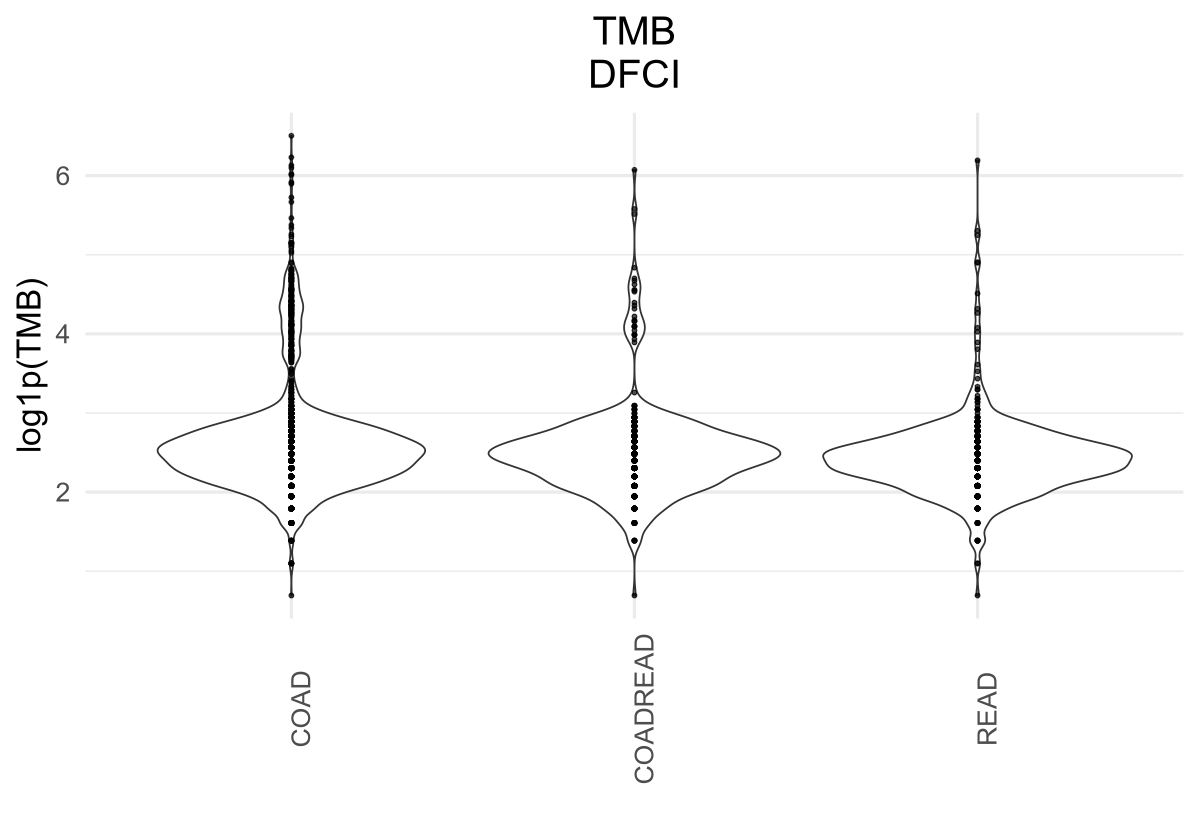

In [129]:
options(repr.plot.width = 10,repr.plot.height = 7)
ggplot(tmb_df %>% filter(tumor_type=='Colorectal Cancer'), aes(x = category, y = log10_TMB)) +
  geom_violin() +
  geom_point(color = "black", size = 1, alpha = 0.7)+
  #geom_point(aes(x = category, y = mean_value, shape = "Mean"), data = mean_data, color = "red", size = 4, alpha = 0.7) +
  #geom_point(aes(x = category, y = mean_value, shape = "Mean"), data = mean_data, color = "red", size = 5, fill = "red") +
  labs(title = "TMB\nDFCI", x = "", y = "log1p(TMB)") +
  scale_shape_manual(values = c("Mean" = 15)) +
  theme_minimal(base_size = 20)+theme(plot.title = element_text(hjust = 0.5),axis.text.x = element_text(angle = 90))

In [130]:
crc_cutoff<-3

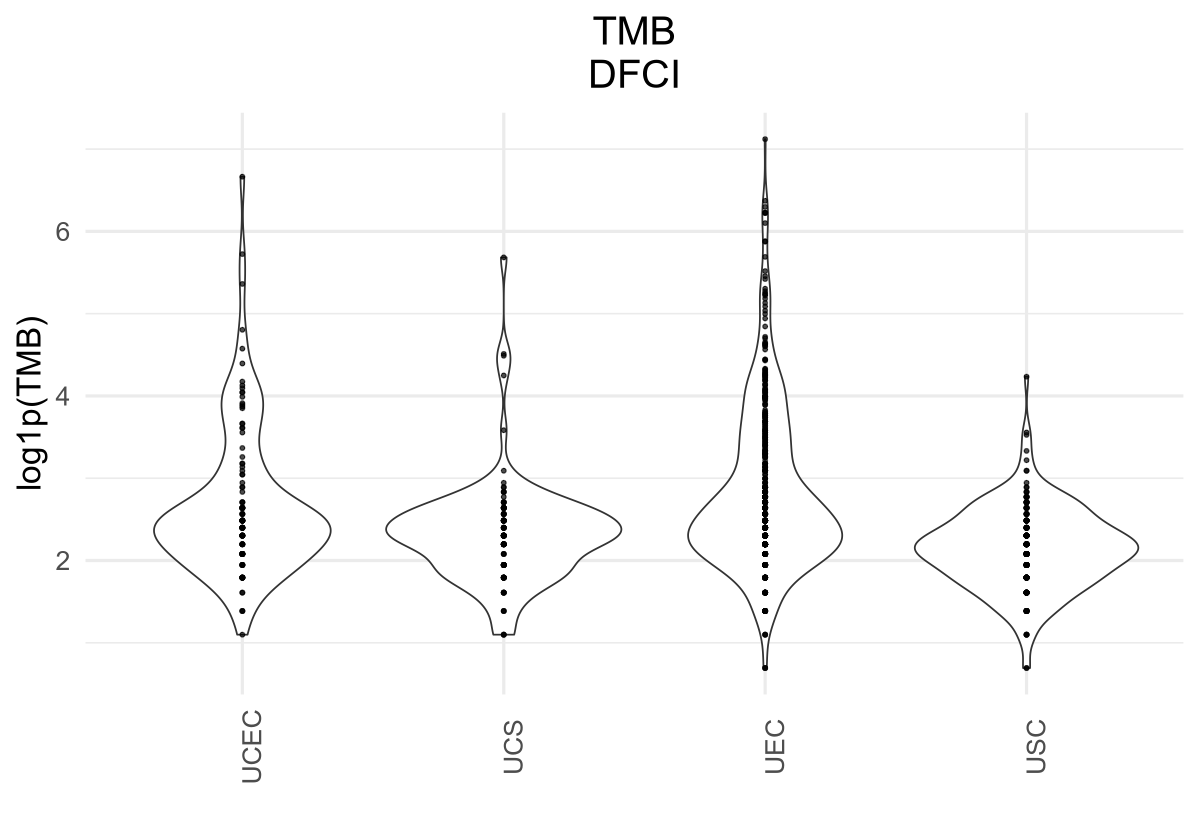

In [131]:
options(repr.plot.width = 10,repr.plot.height = 7)
ggplot(tmb_df %>% filter(tumor_type=='Endometrial Cancer'), aes(x = category, y = log10_TMB)) +
  geom_violin() +
  geom_point(color = "black", size = 1, alpha = 0.7)+
  #geom_point(aes(x = category, y = mean_value, shape = "Mean"), data = mean_data, color = "red", size = 4, alpha = 0.7) +
  #geom_point(aes(x = category, y = mean_value, shape = "Mean"), data = mean_data, color = "red", size = 5, fill = "red") +
  labs(title = "TMB\nDFCI", x = "", y = "log1p(TMB)") +
  scale_shape_manual(values = c("Mean" = 15)) +
  theme_minimal(base_size = 20)+theme(plot.title = element_text(hjust = 0.5),axis.text.x = element_text(angle = 90))

In [132]:
ucec_cutoff<-3

In [133]:
head(tmb_df)

Tumor_Sample_Barcode,n,category,log10_TMB,Ordered_Number,tumor_type
<chr>,<int>,<chr>,<dbl>,<int>,<chr>
GENIE-DFCI-000058-11433,1,PLEMESO,0.6931472,1,Mesothelioma
GENIE-DFCI-000063-2214,1,THPA,0.6931472,1,Thyroid Cancer
GENIE-DFCI-000093-2264,1,UEC,0.6931472,1,Endometrial Cancer
GENIE-DFCI-000221-966,1,IDC,0.6931472,1,Breast Cancer
GENIE-DFCI-000239-1977,1,CCRCC,0.6931472,1,Renal Cell Carcinoma
GENIE-DFCI-000255-8434,1,LUAD,0.6931472,1,Non-Small Cell Lung Cancer


## Setting unclassified BRCA samples into IDC or ILC using CDH1 status

In [137]:
dim(genie_cna)

[1]   1000 130124

In [138]:
genie_cna[1:10,1:10]

,GENIE-DFCI-002910-3355,GENIE-DFCI-003035-3760,GENIE-DFCI-003337-817,GENIE-DFCI-001601-3485,GENIE-DFCI-000578-250,GENIE-DFCI-004466-422,GENIE-DFCI-004327-47,GENIE-DFCI-003498-202,GENIE-DFCI-002153-155,GENIE-DFCI-004280-289
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ABCB11,0,0,0,0,0,0,0,0,0,0
ABL1,0,0,0,1,0,0,0,0,0,0
ABL2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ACTB,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ACTG1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ACVR1,0,0,0,0,0,0,0,0,0,0
ACVR1B,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ACVRL1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AFF2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [139]:
breast_sample_to_annotate<-(tmb_df %>% filter(category %in% c('BRCA','BRCANOS','BRCNOS')))$Tumor_Sample_Barcode

In [140]:
breast_sample_to_annotate <- intersect(breast_sample_to_annotate,colnames(genie_cna))
#genie_cna['CDH1',breast_sample_to_annotate]

In [141]:
breast_sample_to_annotate_ilc<-rownames(as.data.frame(t(data.frame(genie_cna['CDH1',breast_sample_to_annotate],check.names = FALSE))) %>% filter(CDH1<=-1))
breast_sample_to_annotate_idc<-rownames(as.data.frame(t(data.frame(genie_cna['CDH1',breast_sample_to_annotate],check.names = FALSE))) %>% filter(CDH1>=0))

In [142]:
head(tmb_df)

Tumor_Sample_Barcode,n,category,log10_TMB,Ordered_Number,tumor_type
<chr>,<int>,<chr>,<dbl>,<int>,<chr>
GENIE-DFCI-000058-11433,1,PLEMESO,0.6931472,1,Mesothelioma
GENIE-DFCI-000063-2214,1,THPA,0.6931472,1,Thyroid Cancer
GENIE-DFCI-000093-2264,1,UEC,0.6931472,1,Endometrial Cancer
GENIE-DFCI-000221-966,1,IDC,0.6931472,1,Breast Cancer
GENIE-DFCI-000239-1977,1,CCRCC,0.6931472,1,Renal Cell Carcinoma
GENIE-DFCI-000255-8434,1,LUAD,0.6931472,1,Non-Small Cell Lung Cancer


In [143]:
tmb_df<-tmb_df %>% mutate(new_category=case_when((tumor_type=='Colorectal Cancer' & log10_TMB>=3) ~ 'CRC_HM',
                                         (tumor_type=='Colorectal Cancer' & log10_TMB<3) ~ 'CRC_LM',
                                         (tumor_type=='Endometrial Cancer' & log10_TMB>=3 & category %notin%c('USC','UCS')) ~ 'UCEC_HM',
                                         (tumor_type=='Endometrial Cancer' & log10_TMB<3 & category %notin%c('USC','UCS')) ~ 'UCEC_LM',
                                         (tumor_type=='Glioma'  & category %in% c('AASTR','ASTR','ODG')) ~ 'Glioma_low_grade',                                                 
                                         (tumor_type=='Glioma'  & category %in% c('GB','GBM')) ~ 'GBM',
                                         (tumor_type=='Head and Neck Cancer') ~ 'HNSC',
                                         (tumor_type=='Renal Cell Carcinoma') ~ 'RCC',
                                         (tumor_type=='Melanoma' & category %in% c('MEL','SKCM','MUP')) ~ 'MEL',
                                         (tumor_type=='Breast Cancer' & Tumor_Sample_Barcode %in% breast_sample_to_annotate_ilc) ~ 'ILC',
                                         (tumor_type=='Breast Cancer' & Tumor_Sample_Barcode %in% breast_sample_to_annotate_idc) ~ 'IDC',
                                         (tumor_type=='Esophagogastric Cancer' & category %in% c('EGC','GEJ')) ~ 'ESCA',
                                         TRUE ~ category
                                        ))

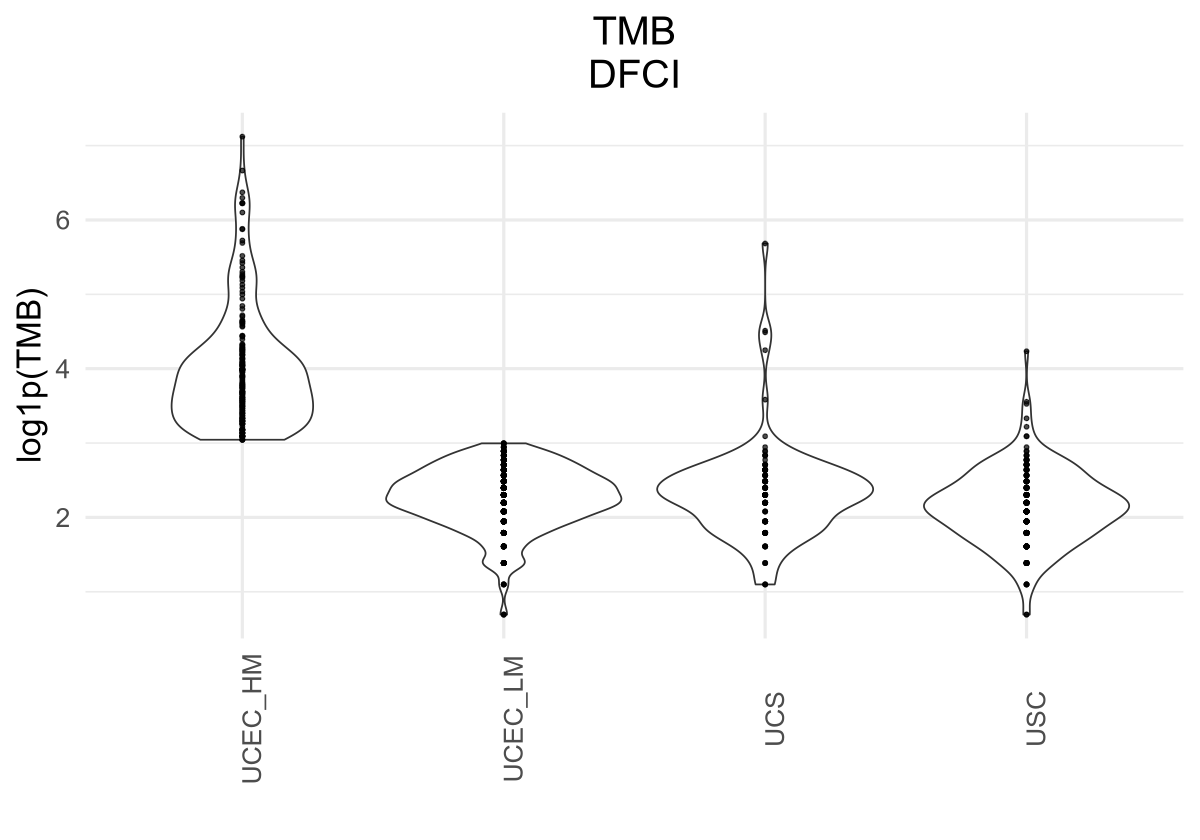

In [146]:
options(repr.plot.width = 10,repr.plot.height = 7)
ggplot(tmb_df %>% filter(tumor_type=='Endometrial Cancer'), aes(x = new_category, y = log10_TMB)) +
  geom_violin() +
  geom_point(color = "black", size = 1, alpha = 0.7)+
  #geom_point(aes(x = category, y = mean_value, shape = "Mean"), data = mean_data, color = "red", size = 4, alpha = 0.7) +
  #geom_point(aes(x = category, y = mean_value, shape = "Mean"), data = mean_data, color = "red", size = 5, fill = "red") +
  labs(title = "TMB\nDFCI", x = "", y = "log1p(TMB)") +
  scale_shape_manual(values = c("Mean" = 15)) +
  theme_minimal(base_size = 20)+theme(plot.title = element_text(hjust = 0.5),axis.text.x = element_text(angle = 90))

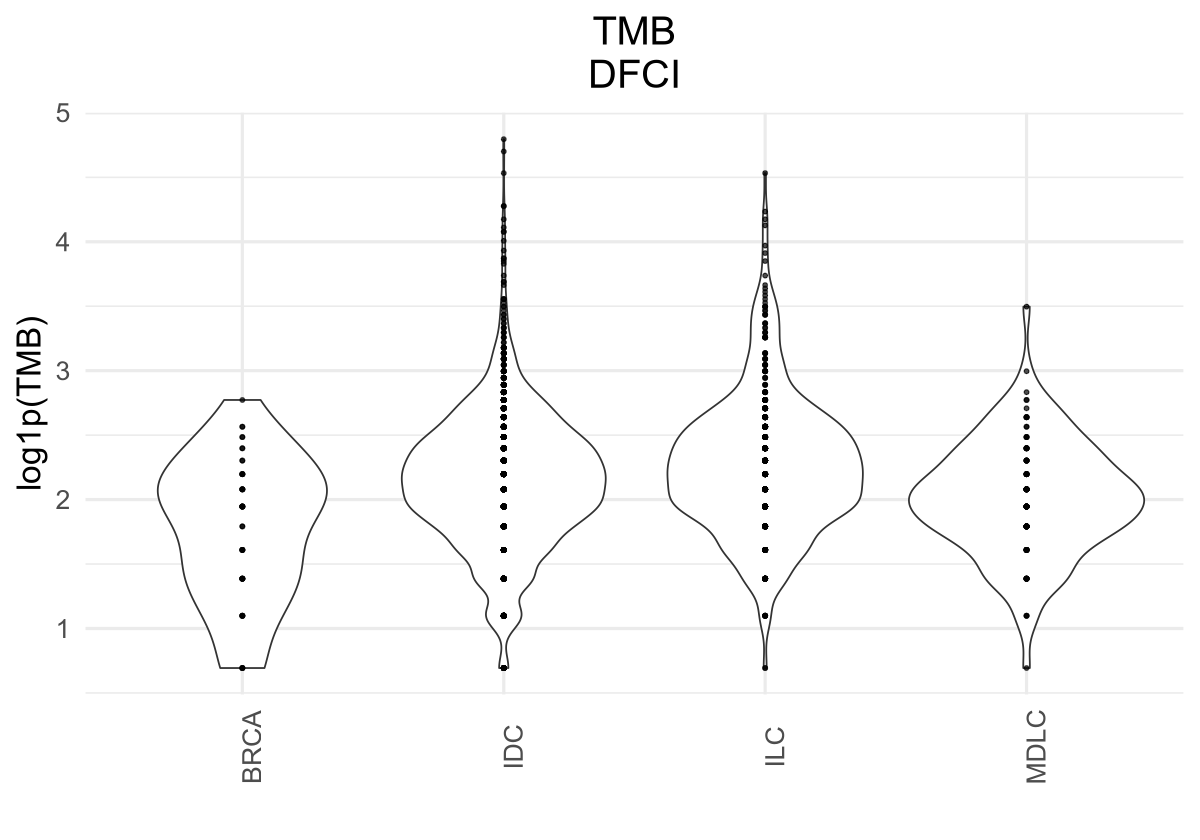

In [147]:
options(repr.plot.width = 10,repr.plot.height = 7)
ggplot(tmb_df %>% filter(tumor_type=='Breast Cancer'), aes(x = new_category, y = log10_TMB)) +
  geom_violin() +
  geom_point(color = "black", size = 1, alpha = 0.7)+
  #geom_point(aes(x = category, y = mean_value, shape = "Mean"), data = mean_data, color = "red", size = 4, alpha = 0.7) +
  #geom_point(aes(x = category, y = mean_value, shape = "Mean"), data = mean_data, color = "red", size = 5, fill = "red") +
  labs(title = "TMB\nDFCI", x = "", y = "log1p(TMB)") +
  scale_shape_manual(values = c("Mean" = 15)) +
  theme_minimal(base_size = 20)+theme(plot.title = element_text(hjust = 0.5),axis.text.x = element_text(angle = 90))

In [148]:
head(tmb_df)

Tumor_Sample_Barcode,n,category,log10_TMB,Ordered_Number,tumor_type,new_category
<chr>,<int>,<chr>,<dbl>,<int>,<chr>,<chr>
GENIE-DFCI-000058-11433,1,PLEMESO,0.6931472,1,Mesothelioma,PLEMESO
GENIE-DFCI-000063-2214,1,THPA,0.6931472,1,Thyroid Cancer,THPA
GENIE-DFCI-000093-2264,1,UEC,0.6931472,1,Endometrial Cancer,UCEC_LM
GENIE-DFCI-000221-966,1,IDC,0.6931472,1,Breast Cancer,IDC
GENIE-DFCI-000239-1977,1,CCRCC,0.6931472,1,Renal Cell Carcinoma,RCC
GENIE-DFCI-000255-8434,1,LUAD,0.6931472,1,Non-Small Cell Lung Cancer,LUAD


In [149]:
tmb_df<-tmb_df %>% filter(new_category!='BRCA')

In [150]:
head(genie_metadata_15_dfci_with_mutation_selected_final_atleast_100_samples,2)

,PATIENT_ID,SEX,PRIMARY_RACE,ETHNICITY,CENTER,INT_CONTACT,INT_DOD,YEAR_CONTACT,DEAD,YEAR_DEATH,SAMPLE_ID,AGE_AT_SEQ_REPORT,ONCOTREE_CODE,SAMPLE_TYPE,SEQ_ASSAY_ID,CANCER_TYPE,CANCER_TYPE_DETAILED,SAMPLE_TYPE_DETAILED
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,GENIE-DFCI-000145,Male,White,Non-Spanish/non-Hispanic,DFCI,26418,Not Applicable,2022,False,Not Applicable,GENIE-DFCI-000145-3971,64,LUAD,Metastasis,DFCI-ONCOPANEL-2,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Metastasis site unspecified
2,GENIE-DFCI-007383,Male,White,Non-Spanish/non-Hispanic,DFCI,23668,23673,2015,True,2015,GENIE-DFCI-007383-3930,64,LUAD,Metastasis,DFCI-ONCOPANEL-2,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Metastasis site unspecified


In [151]:
tmb_df<-tmb_df %>% mutate(new_tumor_run_group = case_when(category %in% c('HCC') ~'Liver Cancer',
                                                         category %in% c('GBAD','GBC','CHOL','IHCH','EHCH','PHCH') ~ 'Billary Tract Cancer',
                                                         TRUE  ~ tumor_type))

In [152]:
head(tmb_df)

Tumor_Sample_Barcode,n,category,log10_TMB,Ordered_Number,tumor_type,new_category,new_tumor_run_group
<chr>,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>
GENIE-DFCI-000058-11433,1,PLEMESO,0.6931472,1,Mesothelioma,PLEMESO,Mesothelioma
GENIE-DFCI-000063-2214,1,THPA,0.6931472,1,Thyroid Cancer,THPA,Thyroid Cancer
GENIE-DFCI-000093-2264,1,UEC,0.6931472,1,Endometrial Cancer,UCEC_LM,Endometrial Cancer
GENIE-DFCI-000221-966,1,IDC,0.6931472,1,Breast Cancer,IDC,Breast Cancer
GENIE-DFCI-000239-1977,1,CCRCC,0.6931472,1,Renal Cell Carcinoma,RCC,Renal Cell Carcinoma
GENIE-DFCI-000255-8434,1,LUAD,0.6931472,1,Non-Small Cell Lung Cancer,LUAD,Non-Small Cell Lung Cancer


In [153]:
# Remove un-annoated BRCA sample
genie_metadata_15_dfci_with_mutation_selected_final_atleast_100_samples<-genie_metadata_15_dfci_with_mutation_selected_final_atleast_100_samples %>% filter(SAMPLE_ID %in% tmb_df$Tumor_Sample_Barcode)

In [154]:
sample_annotaion <- tmb_df$new_category
names(sample_annotaion)<-tmb_df$Tumor_Sample_Barcode

In [155]:
genie_metadata_15_dfci_with_mutation_selected_final_atleast_100_samples<-genie_metadata_15_dfci_with_mutation_selected_final_atleast_100_samples %>% mutate(final_class=sample_annotaion[SAMPLE_ID])

In [156]:
head(genie_metadata_15_dfci_with_mutation_selected_final_atleast_100_samples,2)
dim(genie_metadata_15_dfci_with_mutation_selected_final_atleast_100_samples)

,PATIENT_ID,SEX,PRIMARY_RACE,ETHNICITY,CENTER,INT_CONTACT,INT_DOD,YEAR_CONTACT,DEAD,YEAR_DEATH,SAMPLE_ID,AGE_AT_SEQ_REPORT,ONCOTREE_CODE,SAMPLE_TYPE,SEQ_ASSAY_ID,CANCER_TYPE,CANCER_TYPE_DETAILED,SAMPLE_TYPE_DETAILED,final_class
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,GENIE-DFCI-000145,Male,White,Non-Spanish/non-Hispanic,DFCI,26418,Not Applicable,2022,False,Not Applicable,GENIE-DFCI-000145-3971,64,LUAD,Metastasis,DFCI-ONCOPANEL-2,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Metastasis site unspecified,LUAD
2,GENIE-DFCI-007383,Male,White,Non-Spanish/non-Hispanic,DFCI,23668,23673,2015,True,2015,GENIE-DFCI-007383-3930,64,LUAD,Metastasis,DFCI-ONCOPANEL-2,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Metastasis site unspecified,LUAD


[1] 22264    19

In [157]:
sample_annotaion <- tmb_df$new_tumor_run_group
names(sample_annotaion)<-tmb_df$Tumor_Sample_Barcode

In [158]:
genie_metadata_15_dfci_with_mutation_selected_final_atleast_100_samples<-genie_metadata_15_dfci_with_mutation_selected_final_atleast_100_samples %>% mutate(final_run_group=sample_annotaion[SAMPLE_ID])

In [159]:
head(genie_metadata_15_dfci_with_mutation_selected_final_atleast_100_samples,2)
dim(genie_metadata_15_dfci_with_mutation_selected_final_atleast_100_samples)

,PATIENT_ID,SEX,PRIMARY_RACE,ETHNICITY,CENTER,INT_CONTACT,INT_DOD,YEAR_CONTACT,DEAD,YEAR_DEATH,SAMPLE_ID,AGE_AT_SEQ_REPORT,ONCOTREE_CODE,SAMPLE_TYPE,SEQ_ASSAY_ID,CANCER_TYPE,CANCER_TYPE_DETAILED,SAMPLE_TYPE_DETAILED,final_class,final_run_group
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,GENIE-DFCI-000145,Male,White,Non-Spanish/non-Hispanic,DFCI,26418,Not Applicable,2022,False,Not Applicable,GENIE-DFCI-000145-3971,64,LUAD,Metastasis,DFCI-ONCOPANEL-2,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Metastasis site unspecified,LUAD,Non-Small Cell Lung Cancer
2,GENIE-DFCI-007383,Male,White,Non-Spanish/non-Hispanic,DFCI,23668,23673,2015,True,2015,GENIE-DFCI-007383-3930,64,LUAD,Metastasis,DFCI-ONCOPANEL-2,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Metastasis site unspecified,LUAD,Non-Small Cell Lung Cancer


[1] 22264    20

In [160]:
dfci_count<-genie_metadata_15_dfci_with_mutation_selected_final_atleast_100_samples %>% count(final_run_group,final_class) %>% arrange(desc(n))

In [161]:
head(dfci_count)

,final_run_group,final_class,n
,<chr>,<chr>,<int>
1,Non-Small Cell Lung Cancer,LUAD,2901
2,Colorectal Cancer,CRC_LM,2836
3,Breast Cancer,IDC,1942
4,Glioma,GBM,1635
5,Pancreatic Cancer,PAAD,1319
6,Melanoma,MEL,941


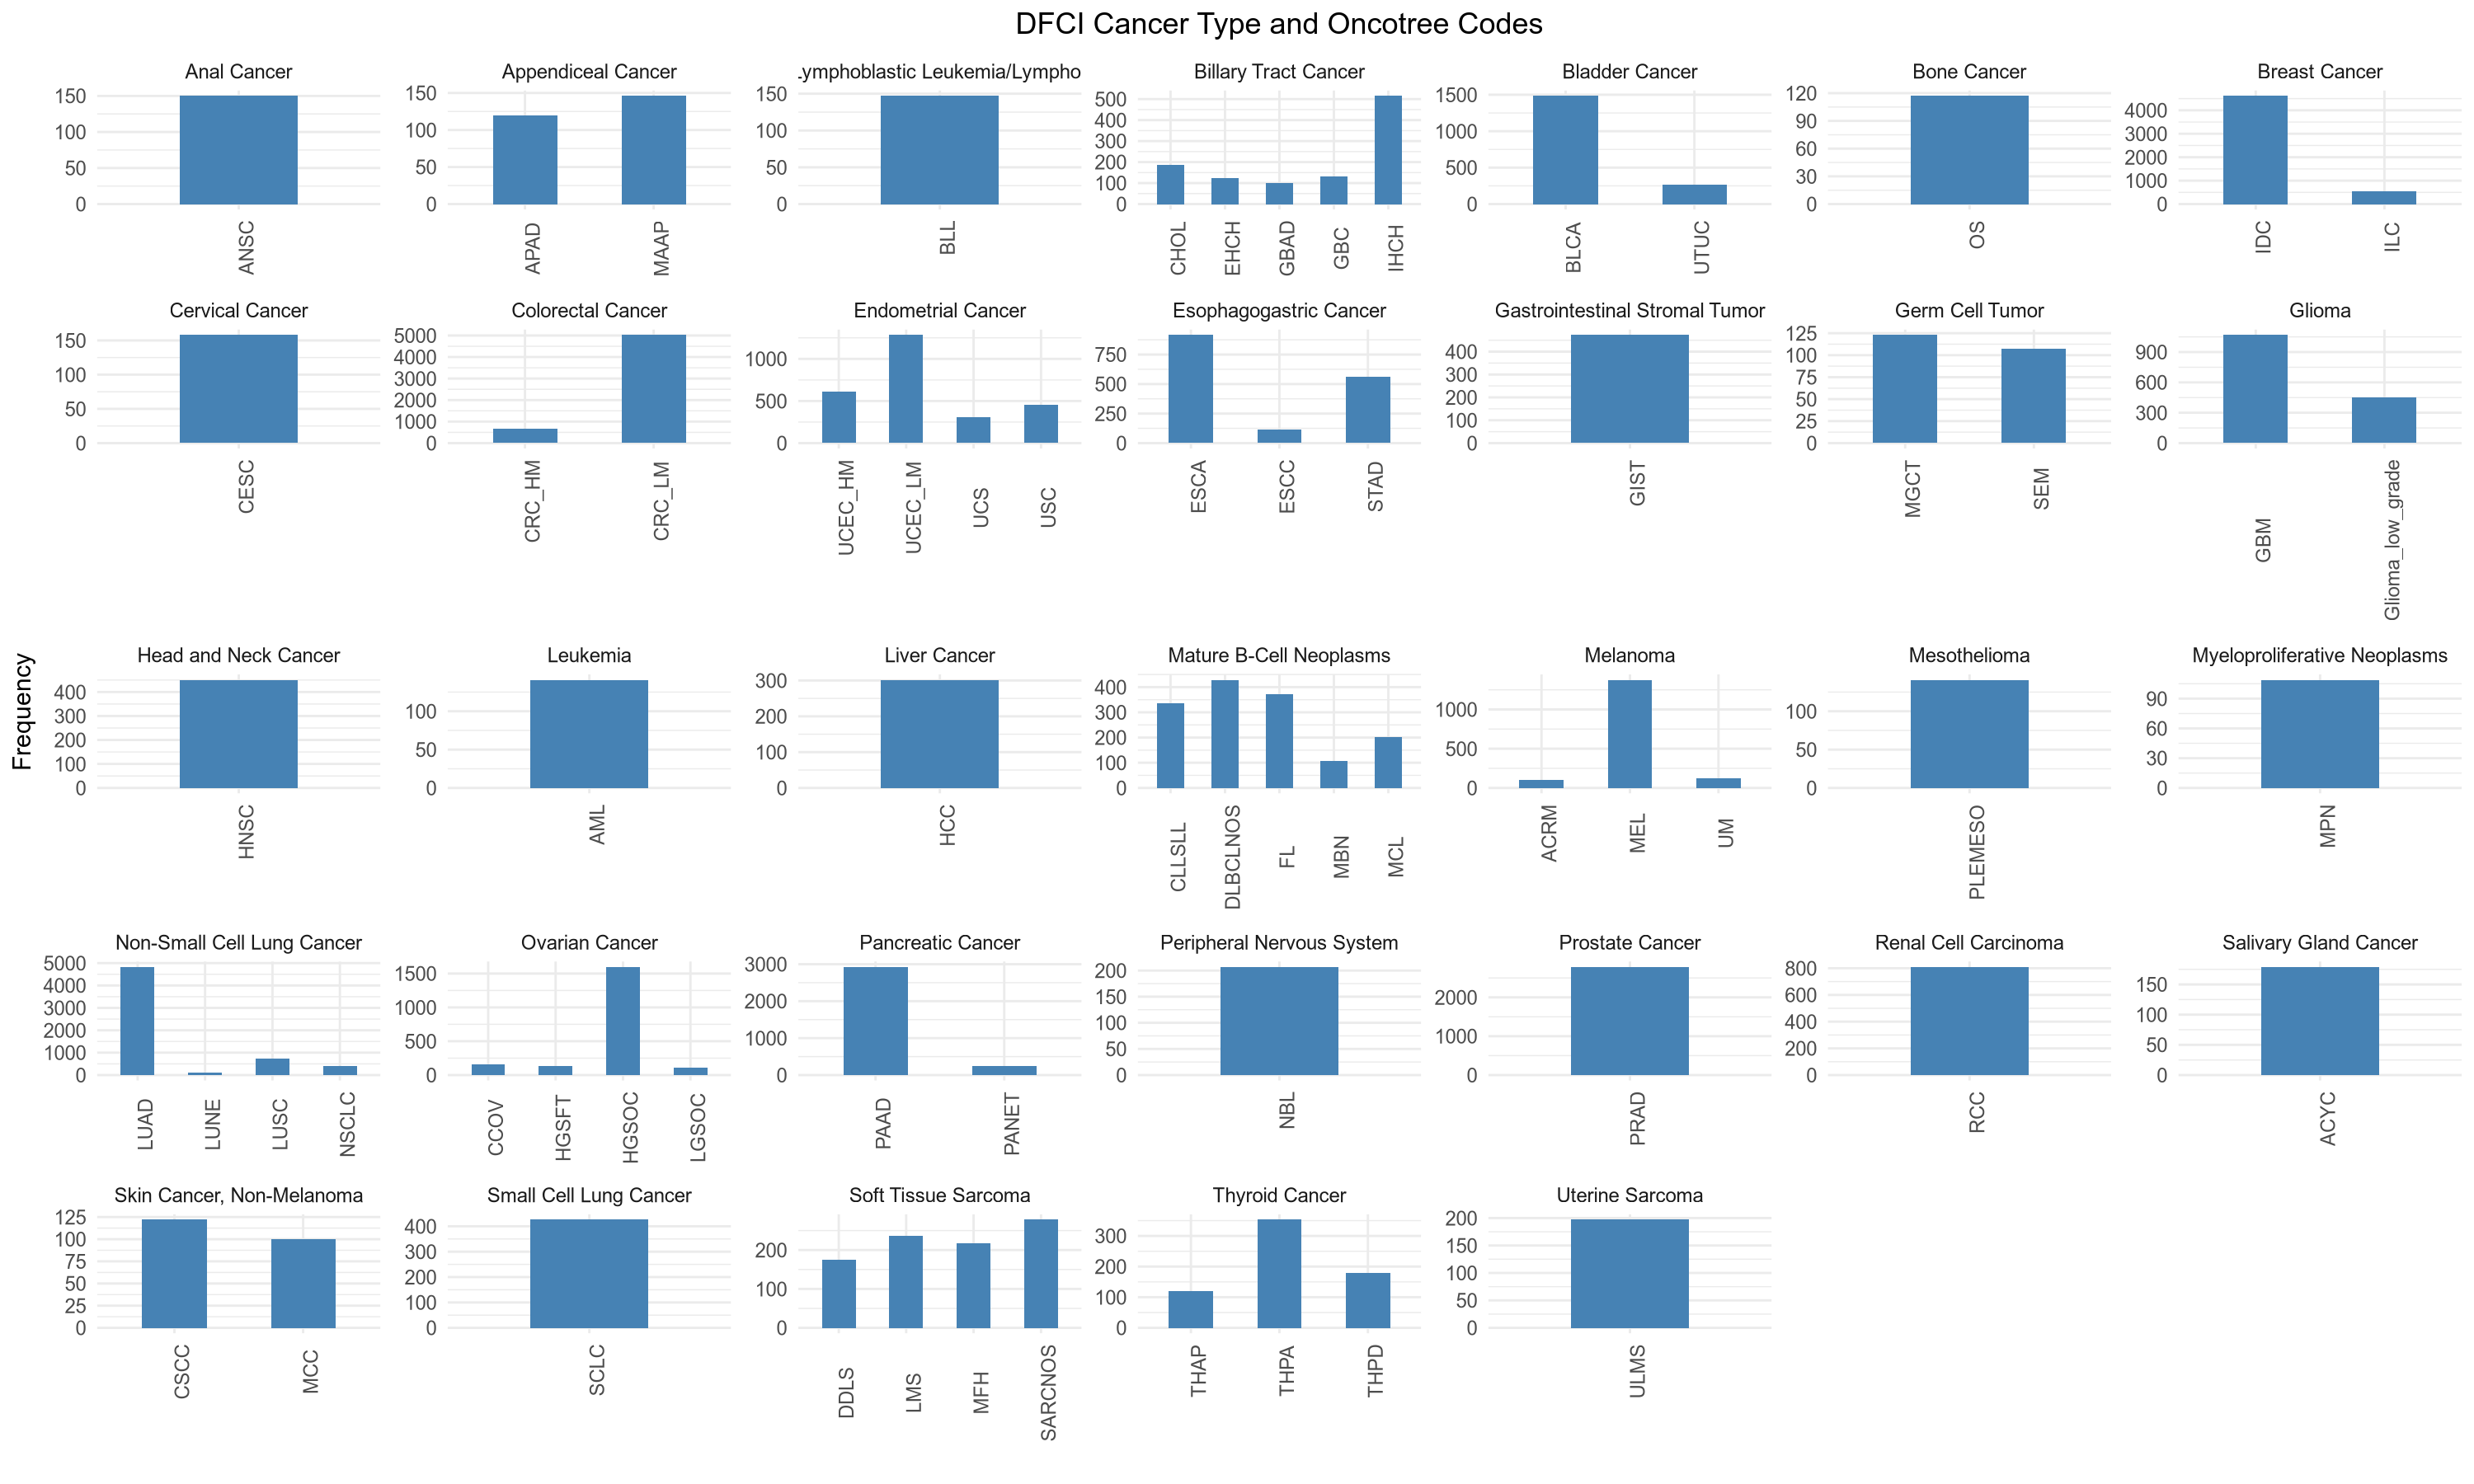

In [162]:
# Create a bar plot faceted by group
options(repr.plot.width = 25,repr.plot.height = 15)
ggplot(msk_count, aes(x = final_class, y = n)) +
  geom_bar(stat = "identity", fill = "steelblue",width = 0.5) +
  #geom_text(aes(label = n), vjust = -0.5) +
  facet_wrap(~ final_run_group, nrow = 7,ncol=7,scales="free") +
  labs(title = "DFCI Cancer Type and Oncotree Codes",x='',y = "Frequency") +
  theme_minimal(base_size = 18)+theme(plot.title = element_text(hjust = 0.5),axis.text.x = element_text(angle = 90))

In [163]:
saveRDS(genie_metadata_15_dfci_with_mutation_selected_final_atleast_100_samples,file='../data/processed/dfci_one_patient_one_sample_final.rds')

# Gene Panel Information

In [164]:
genie_genomic_information <- read.delim('../data/raw/genie/genomic_information.txt')

In [165]:
head(genie_genomic_information)

,Chromosome,Start_Position,End_Position,Hugo_Symbol,ID,SEQ_ASSAY_ID,Feature_Type,includeInPanel,clinicalReported
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,9,133738302,133738491,ABL1,ABL1,UHN-48-V1,exon,True,
2,9,133747476,133747664,ABL1,ABL1,UHN-48-V1,exon,True,
3,9,133748157,133748327,ABL1,ABL1,UHN-48-V1,exon,True,
4,9,133748277,133748457,ABL1,ABL1,UHN-48-V1,exon,True,
5,9,133750328,133750516,ABL1,ABL1,UHN-48-V1,exon,True,
6,14,105246429,105246600,AKT1,AKT1,UHN-48-V1,exon,True,


In [166]:
gene_panels<-genie_genomic_information %>% select(Hugo_Symbol,SEQ_ASSAY_ID) %>% distinct()

In [167]:
head(gene_panels)

,Hugo_Symbol,SEQ_ASSAY_ID
,<chr>,<chr>
1,ABL1,UHN-48-V1
2,AKT1,UHN-48-V1
3,ALK,UHN-48-V1
4,APC,UHN-48-V1
5,ATM,UHN-48-V1
6,BRAF,UHN-48-V1


In [168]:
gene_panels<-gene_panels %>% separate(SEQ_ASSAY_ID,into=c('Center'),sep="-",remove = FALSE)

Warning message:
“Expected 1 pieces. Additional pieces discarded in 34876 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


In [169]:
head(gene_panels)

,Hugo_Symbol,SEQ_ASSAY_ID,Center
,<chr>,<chr>,<chr>
1,ABL1,UHN-48-V1,UHN
2,AKT1,UHN-48-V1,UHN
3,ALK,UHN-48-V1,UHN
4,APC,UHN-48-V1,UHN
5,ATM,UHN-48-V1,UHN
6,BRAF,UHN-48-V1,UHN


In [170]:
gene_panels_filter<-gene_panels %>% filter(Center %in% c('MSK'))

In [171]:
# Split the values in Column1 based on the values in Column2
elements_list <- split(gene_panels_filter$Hugo_Symbol, gene_panels_filter$SEQ_ASSAY_ID)

In [172]:
length(elements_list)

[1] 6

In [173]:
str(elements_list)

List of 6
 $ MSK-IMPACT-HEME-400: chr [1:399] "MTOR" "NRAS" "CD58" "FAM46C" ...
 $ MSK-IMPACT-HEME-468: chr [1:1433] "COL11A1" "NRBF2P3" "MTOR" "MOV10" ...
 $ MSK-IMPACT341      : chr [1:341] "MTOR" "NRAS" "VTCN1" "FAM46C" ...
 $ MSK-IMPACT410      : chr [1:410] "MTOR" "NRAS" "VTCN1" "FAM46C" ...
 $ MSK-IMPACT468      : chr [1:468] "MTOR" "NRAS" "CSDE1" "VTCN1" ...
 $ MSK-IMPACT505      : chr [1:506] "MTOR" "NRAS" "CSDE1" "MAD2L2" ...


In [174]:
elements_list$Oncokb <- oncokb_genes

In [175]:
msk_gene_list <- list('all'=Reduce(intersect,elements_list),
                   'p_505'=intersect(elements_list$`MSK-IMPACT505`,elements_list$Oncokb),
                   'p_468'=intersect(elements_list$`MSK-IMPACT468`,elements_list$Oncokb),
                   'p_410'=intersect(elements_list$`MSK-IMPACT410`,elements_list$Oncokb),
                   'p_341'=intersect(elements_list$`MSK-IMPACT341`,elements_list$Oncokb),
                   'p_heme'=Reduce(intersect,list(elements_list$`MSK-IMPACT-HEME-400`,elements_list$Oncokb,elements_list$`MSK-IMPACT-HEME-468`)))

In [176]:
str(msk_gene_list)

List of 6
 $ all   : chr [1:202] "MTOR" "NRAS" "NTRK1" "SDHC" ...
 $ p_505 : chr [1:327] "MTOR" "NRAS" "RIT1" "NTRK1" ...
 $ p_468 : chr [1:306] "MTOR" "NRAS" "RIT1" "NTRK1" ...
 $ p_410 : chr [1:282] "MTOR" "NRAS" "RIT1" "NTRK1" ...
 $ p_341 : chr [1:249] "MTOR" "NRAS" "RIT1" "NTRK1" ...
 $ p_heme: chr [1:267] "MTOR" "NRAS" "CD58" "NTRK1" ...


In [177]:
saveRDS(msk_gene_list,file='../analysis/catalogue/data/msk_oncokb_gene_run_list.rds')

In [178]:
gene_panels_filter<-gene_panels %>% filter(Center %in% c('DFCI'))

In [179]:
# Split the values in Column1 based on the values in Column2
elements_list <- split(gene_panels_filter$Hugo_Symbol, gene_panels_filter$SEQ_ASSAY_ID)

In [180]:
length(elements_list)

[1] 4

In [181]:
str(elements_list)

List of 4
 $ DFCI-ONCOPANEL-1  : chr [1:330] "GSTM5" "MTOR" "NRAS" "CD58" ...
 $ DFCI-ONCOPANEL-2  : chr [1:603] "GSTM5" "MTOR" "NRAS" "CD58" ...
 $ DFCI-ONCOPANEL-3  : chr [1:1286] "KIF1B" "MTOR" "NRAS" "FAM46C" ...
 $ DFCI-ONCOPANEL-3.1: chr [1:1286] "KIF1B" "MTOR" "NRAS" "FAM46C" ...


In [182]:
elements_list$Oncokb <- oncokb_genes

In [183]:
dfci_gene_list <- list('all'=Reduce(intersect,elements_list),
                   'p_2'=intersect(elements_list$`DFCI-ONCOPANEL-2`,elements_list$Oncokb),
                   'p_3'=Reduce(intersect,list(elements_list$`DFCI-ONCOPANEL-3.1`,elements_list$`DFCI-ONCOPANEL-3`,elements_list$Oncokb)),
                   'p_1'=intersect(elements_list$`DFCI-ONCOPANEL-1`,elements_list$Oncokb))

In [184]:
str(dfci_gene_list)

List of 4
 $ all: chr [1:177] "MTOR" "NRAS" "NTRK1" "SDHC" ...
 $ p_2: chr [1:194] "MTOR" "NRAS" "CD58" "NTRK1" ...
 $ p_3: chr [1:257] "MTOR" "NRAS" "RIT1" "NTRK1" ...
 $ p_1: chr [1:183] "MTOR" "NRAS" "CD58" "NTRK1" ...


In [185]:
saveRDS(dfci_gene_list,file='../analysis/catalogue/data/dfci_oncokb_gene_run_list.rds')